In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r"data/99acre_raw_data/99acres_property_data_v3.xlsx")
df.drop(columns=['areaWithType'], inplace=True)

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
df.head()

price  bedRoom  bathroom  balcony        facing property_type  \
0   4500000.0        2         2        1          West          flat   
1   5000000.0        2         2        1          West          flat   
2   4000000.0        2         2        3  undetermined          flat   
3  14700000.0        2         2        2  undetermined          flat   
4   7000000.0        2         2        3  undetermined          flat   

   floor_nbr  additional_room_count  furnishDetails_count  features_count  \
0          4                      0                    18               5   
1          1                      0                    18               5   
2         12                      0                     0               8   
3          2                      1                     0              13   
4          5                      1                     0               0   

   Environment  Safety  Lifestyle  Connectivity  Green Area  Amenities  \
0          4.0     4.0        4.0           4.0         0.0        0.0   
1          4.0     4.0        4.0           5.0         0.0        0.0   
2          4.0     4.0        4.0           5.0         0.0        0.0   
3          0.0     0.0        0.0           0.0         0.0        0.0   
4          5.0     3.0        4.0           4.0         0.0        0.0   

   Management  Construction  nearbyLocations_count  agePossession_avg  \
0         0.0           0.0                     50                3.0   
1         0.0           0.0                     49               10.0   
2         0.0           0.0                      6                0.5   
3         0.0           0.0                      9                0.0   
4         0.0           0.0                     11                0.0   

        prop_location  total_area_in_sqft  rate_per_sqft  
0      Krishna Colony             9687.51           5000  
1         Ashok Vihar             6996.53           7692  
2               Sohna             6404.52           6722  
3   Sector 61 Gurgaon            12916.68          12250  
4   Sector 92 Gurgaon            10858.08           5204

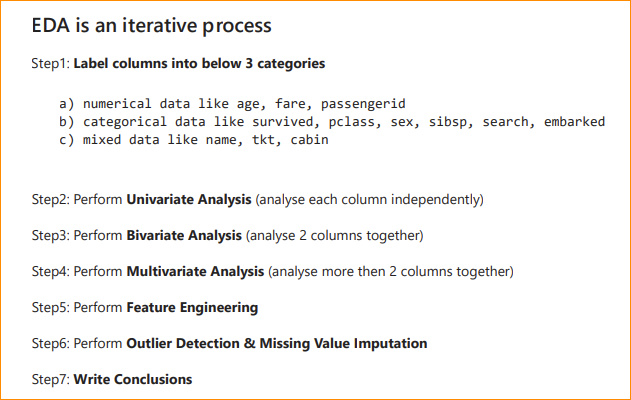

### Label columns

In [13]:
numerical_cols = df.select_dtypes(include=['number']).columns
numerical_cols

Index(['price', 'bedRoom', 'bathroom', 'balcony', 'floor_nbr',
       'additional_room_count', 'furnishDetails_count', 'features_count',
       'Environment', 'Safety', 'Lifestyle', 'Connectivity', 'Green Area',
       'Amenities', 'Management', 'Construction', 'nearbyLocations_count',
       'agePossession_avg', 'total_area_in_sqft', 'rate_per_sqft'],
      dtype='object')

In [14]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
categorical_cols

Index(['facing', 'property_type', 'prop_location'], dtype='object')

### Univariate analysis

#### numerical columns

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

def univariate_analysis(df, col_name):
    """
    Perform univariate analysis on a numerical column in the DataFrame.
    Prints statistical summary, remarks, and conclusions.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    col_name (str): The name of the numerical column to analyze.
    """
    
    # Step 1: Describe the column (Descriptive statistics)
    description = df[col_name].describe()
    count = description['count']
    mean = description['mean']
    std = description['std']
    min_val = description['min']
    p25 = description['25%']
    p50 = description['50%']
    p75 = description['75%']
    max_val = description['max']
    
    print(f"\nUnivariate Analysis for '{col_name}':\n")
    print(description)
    
    # Step 2: Remarks based on the descriptive statistics
    remarks = []
    if min_val < 1:  # This is an example of detecting a potential issue (e.g., ages under 1 might indicate data errors)
        remarks.append(f"Min value is {min_val}. There might be children or data entry issues.")
    
    if p25 < (mean - std) and p75 > (mean + std):
        remarks.append(f"Most data points are spread around the mean value of {mean:.2f}.")

    if max_val > 70:
        remarks.append(f"Max value is {max_val}. Some values are potentially outliers.")

    if len(remarks) == 0:
        remarks.append("Data distribution appears normal.")
    
    print("\nRemarks:")
    for remark in remarks:
        print(f"- {remark}")
    
    # Step 3: Plotting (Histogram, KDE, Boxplot)
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # Histogram
    df[col_name].plot(kind='hist', bins=20, ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col_name} Histogram')
    
    # KDE Plot
    df[col_name].plot(kind='kde', ax=axes[1], color='orange')
    axes[1].set_title(f'{col_name} KDE Plot')

    # Boxplot
    df[col_name].plot(kind='box', ax=axes[2], color='green')
    axes[2].set_title(f'{col_name} Boxplot')
    
    plt.tight_layout()
    plt.show()
    
    # Step 4: Skewness check
    skewness = df[col_name].skew()
    print(f"\nSkewness of {col_name}: {skewness:.2f}")
    if abs(skewness) < 0.5:
        print(f"The data is approximately normally distributed (skewness near 0).")
    else:
        print(f"The data is skewed, suggesting a non-normal distribution.")
    
    # Step 5: Identify Outliers
    # Find outliers based on interquartile range (IQR)
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]
    
    # Check if there are any outliers
    if not outliers.empty:
        print(f"\nOutliers detected: {len(outliers)}")
        print(f"Outliers are outside the range ({lower_bound:.2f}, {upper_bound:.2f})")
        # If there are outliers, print a random sample of 5
        print(outliers.sample(5))
    else:
        print("\nNo outliers detected.")

    # Step 6: Conclusion
    missing_data = df[col_name].isnull().sum()
    total_data = df[col_name].shape[0]
    missing_percentage = (missing_data / total_data) * 100
    
    conclusion = []
    conclusion.append(f"The data contains {missing_percentage:.2f}% missing values.")
    
    if missing_percentage > 5:
        conclusion.append("A significant percentage of the data is missing.")
    
    if len(outliers) > 0:
        conclusion.append("There are some outliers in the data.")
    
    if abs(skewness) < 0.5:
        conclusion.append("The data is approximately normally distributed.")
    else:
        conclusion.append("The data is not normally distributed.")
    
    print("\nConclusion:")
    for point in conclusion:
        print(f"- {point}")
    
    print("\n" + "="*50 + "\n")


Univariate Analysis for 'price':

count        3764
mean     25082922
std      29610727
min        750000
25%       9200000
50%      15000000
75%      27125000
max     315000000
Name: price, dtype: float64

Remarks:
- Max value is 315000000.0. Some values are potentially outliers.


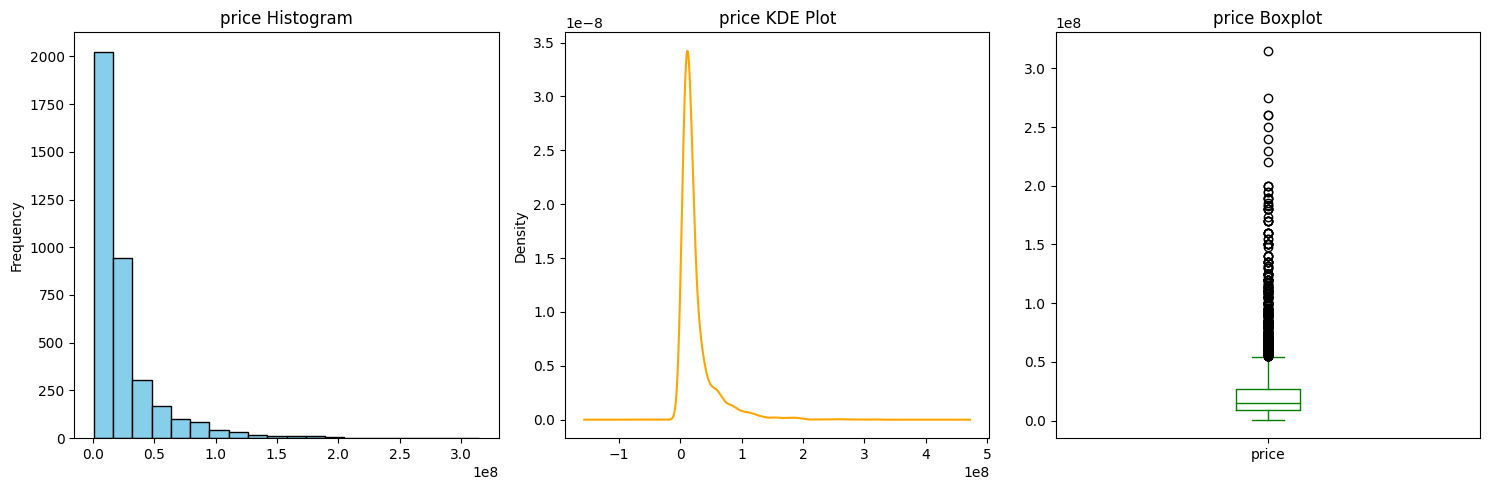


Skewness of price: 3.31
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 431
Outliers are outside the range (-17687500.00, 54012500.00)
        price  bedRoom  bathroom  balcony        facing property_type  \
3574 55000000        8         8        2    North-East         house   
3053 85000000        4         4        3  undetermined         house   
2032 67500000        4         4        0  undetermined          flat   
3407 70000000        5         5        3         South         house   
3591 84900000       12        12        3         North         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3574          3                      1                    18               8   
3053         27                      0                    18               0   
2032         10                      0                    18               0   
3407          2                      1                    18              2

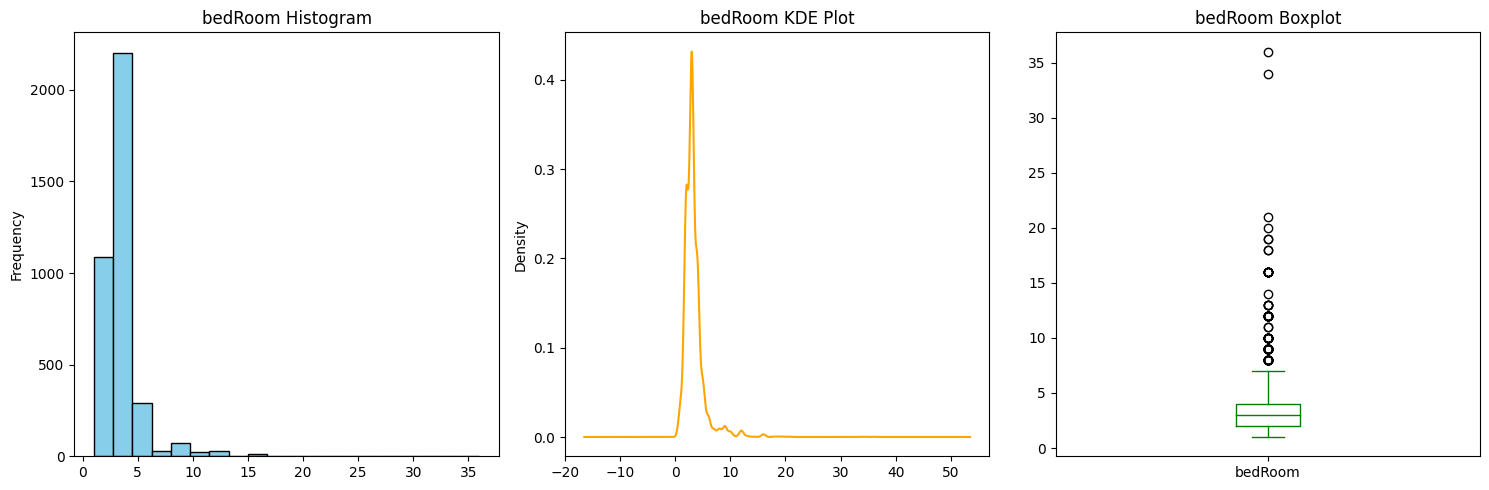


Skewness of bedRoom: 4.82
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 148
Outliers are outside the range (-1.00, 7.00)
        price  bedRoom  bathroom  balcony        facing property_type  \
2837 21000000       10        10        3          West         house   
3569 72500000        9         9        3    North-East         house   
3574 55000000        8         8        2    North-East         house   
3410 88100000        8         6        3          East         house   
2995 28000000       10         7        3  undetermined         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
2837          5                      1                    18               4   
3569          2                      3                    18               8   
3574          3                      1                    18               8   
3410          3                      3                    18               5   
2995   

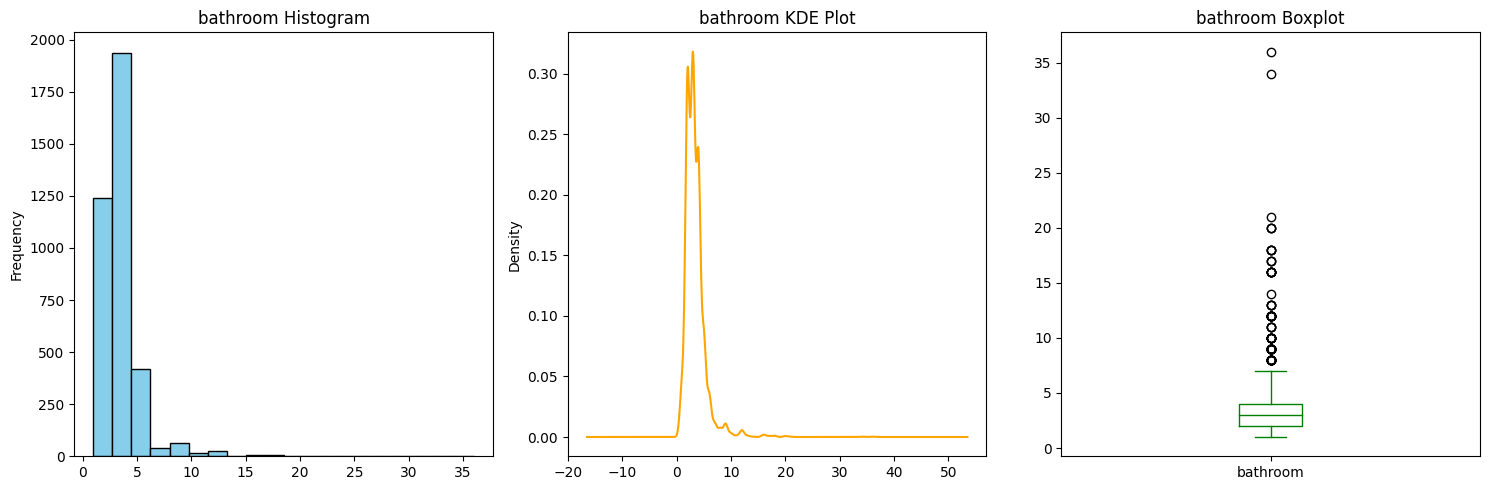


Skewness of bathroom: 4.57
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 127
Outliers are outside the range (-1.00, 7.00)
         price  bedRoom  bathroom  balcony        facing property_type  \
3437 100000000       12        12        3         North         house   
3219  55000000        9         9        3         South         house   
3632 120000000       16        16        3  undetermined         house   
3743  60900000       12        11        3          West         house   
2840  45000000       20        20        3          East         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3437          4                      2                    18              17   
3219          3                      2                    18               0   
3632          4                      4                    18               0   
3743          4                      1                    18               7   


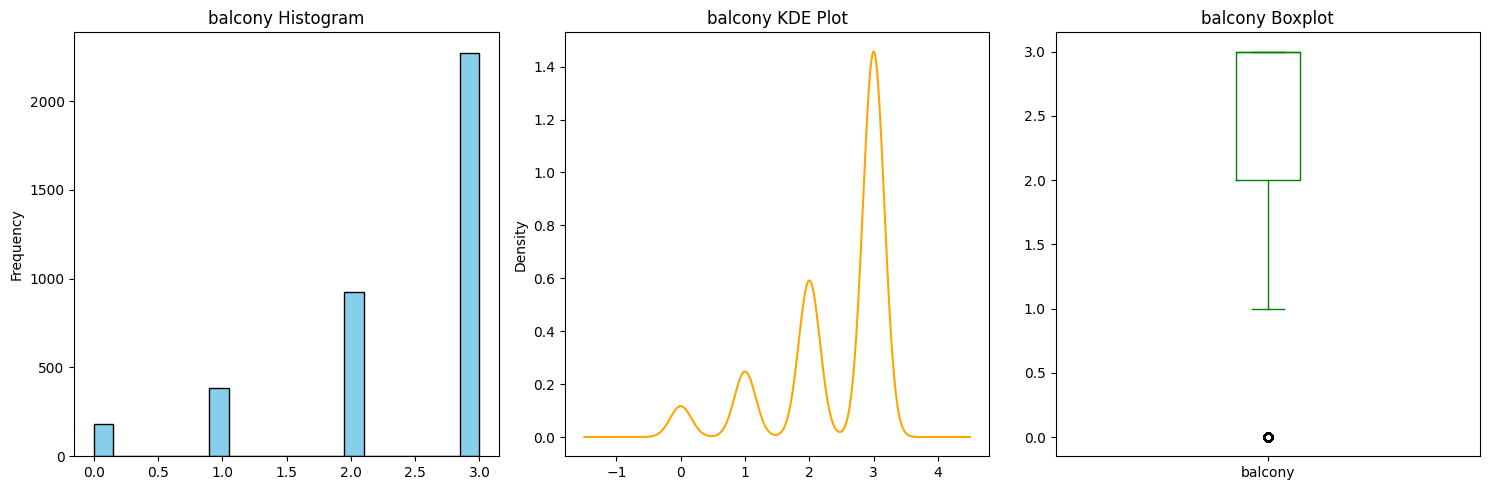


Skewness of balcony: -1.34
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 182
Outliers are outside the range (0.50, 4.50)
        price  bedRoom  bathroom  balcony        facing property_type  \
3282  4750000        3         4        0  undetermined         house   
3251 65000000        4         3        0  undetermined         house   
3107  7000000        2         2        0    North-East         house   
3300  7000000        4         4        0          East         house   
2719  6000000        2         2        0    South-West          flat   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3282          3                      0                    18               0   
3251          2                      0                     0               0   
3107          1                      0                    18               8   
3300          2                      0                     0               0   
2719   

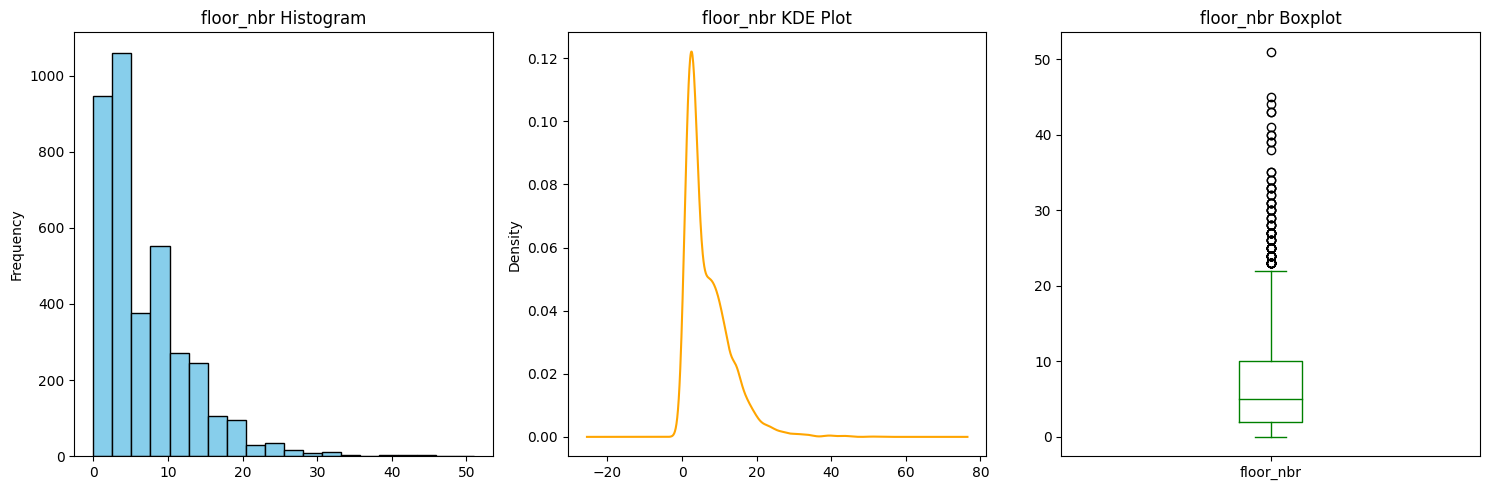


Skewness of floor_nbr: 1.78
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 84
Outliers are outside the range (-10.00, 22.00)
        price  bedRoom  bathroom  balcony        facing property_type  \
89   18000000        4         4        3  undetermined          flat   
330  41000000        4         5        3    North-East          flat   
1423 18500000        3         3        3          East          flat   
681  44500000        4         5        3         North          flat   
2218 41000000        3         4        3  undetermined          flat   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
89           23                      0                     0               0   
330          25                      2                    18              16   
1423         24                      1                     0              32   
681          27                      0                     0              20   
2218

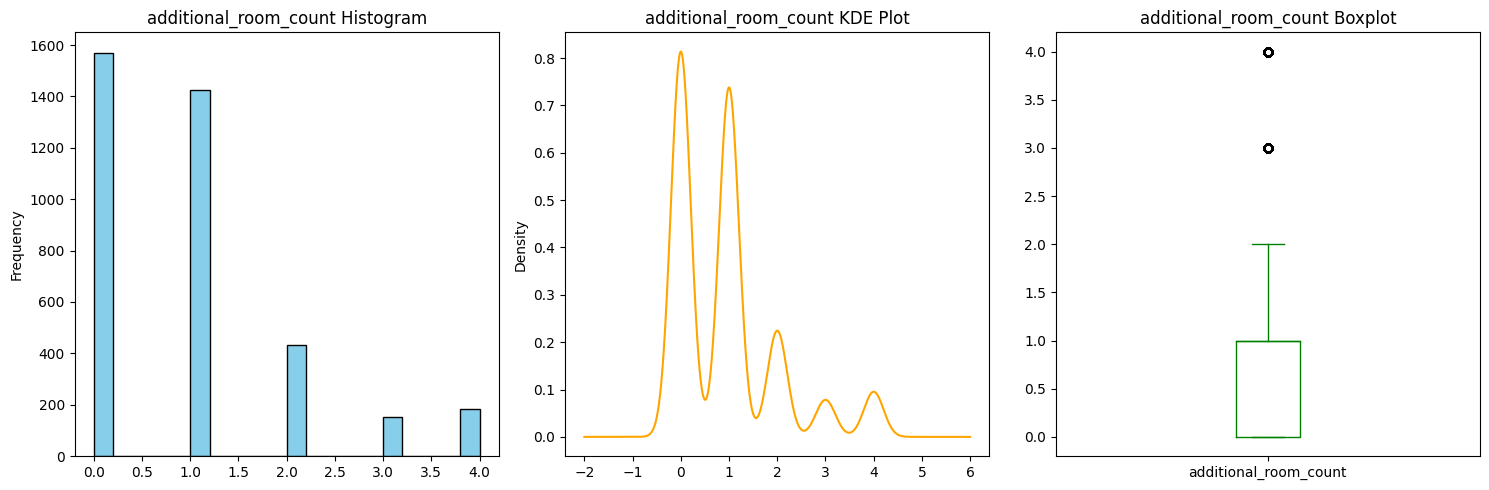


Skewness of additional_room_count: 1.33
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 335
Outliers are outside the range (-1.50, 2.50)
         price  bedRoom  bathroom  balcony      facing property_type  \
3710  64600000        5         5        2        East         house   
3442  80000000        9         9        3  North-East         house   
3369 125000000        6         5        3        East         house   
1140  15500000        3         3        3       South          flat   
3389 155000000        5         6        3        East         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3710          3                      3                    18               5   
3442          4                      4                    18              20   
3369          4                      3                    18               3   
1140          8                      4                    18               7   

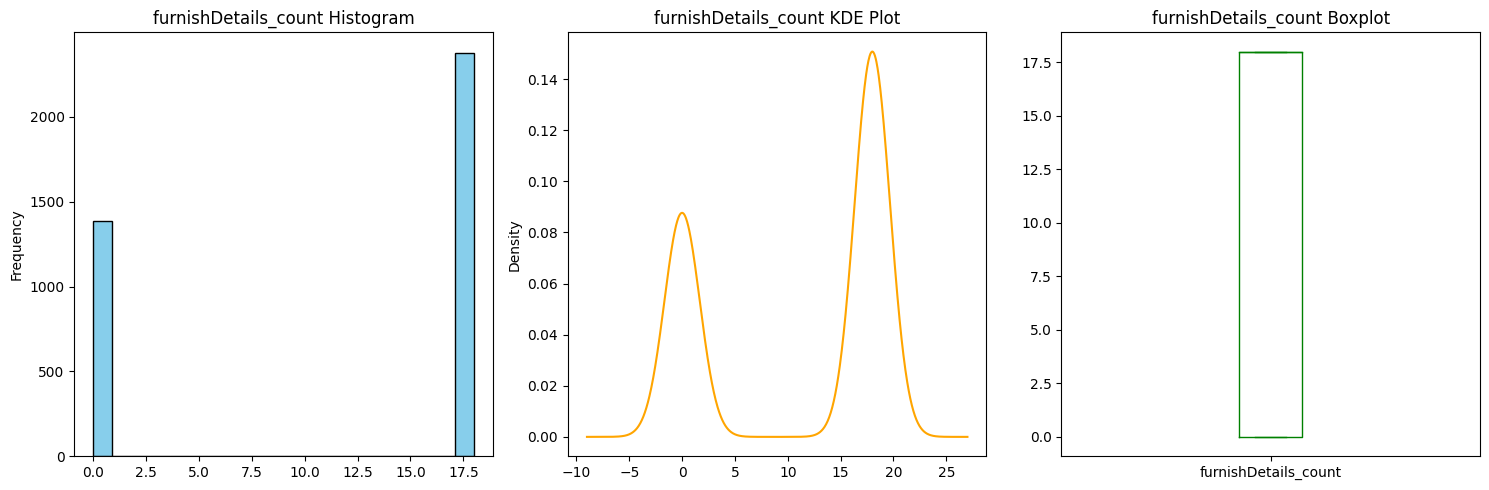


Skewness of furnishDetails_count: -0.55
The data is skewed, suggesting a non-normal distribution.

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is not normally distributed.


==

Univariate Analysis for 'features_count':

count   3764
mean      12
std       10
min        0
25%        4
50%        9
75%       20
max       32
Name: features_count, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


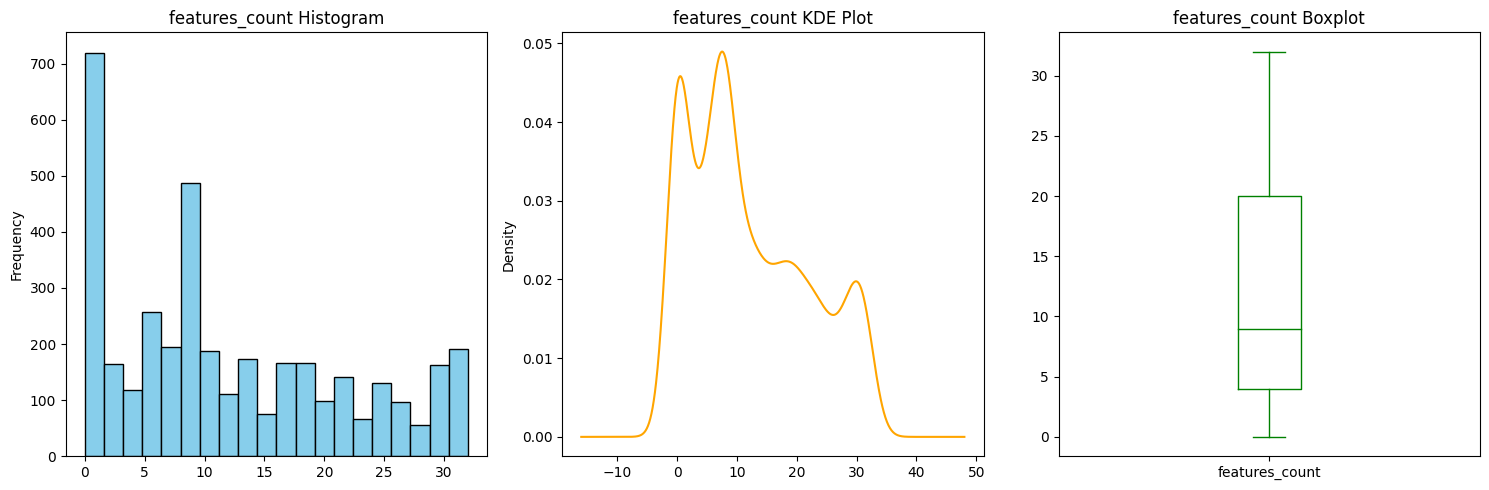


Skewness of features_count: 0.53
The data is skewed, suggesting a non-normal distribution.

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is not normally distributed.


==

Univariate Analysis for 'Environment':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Environment, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


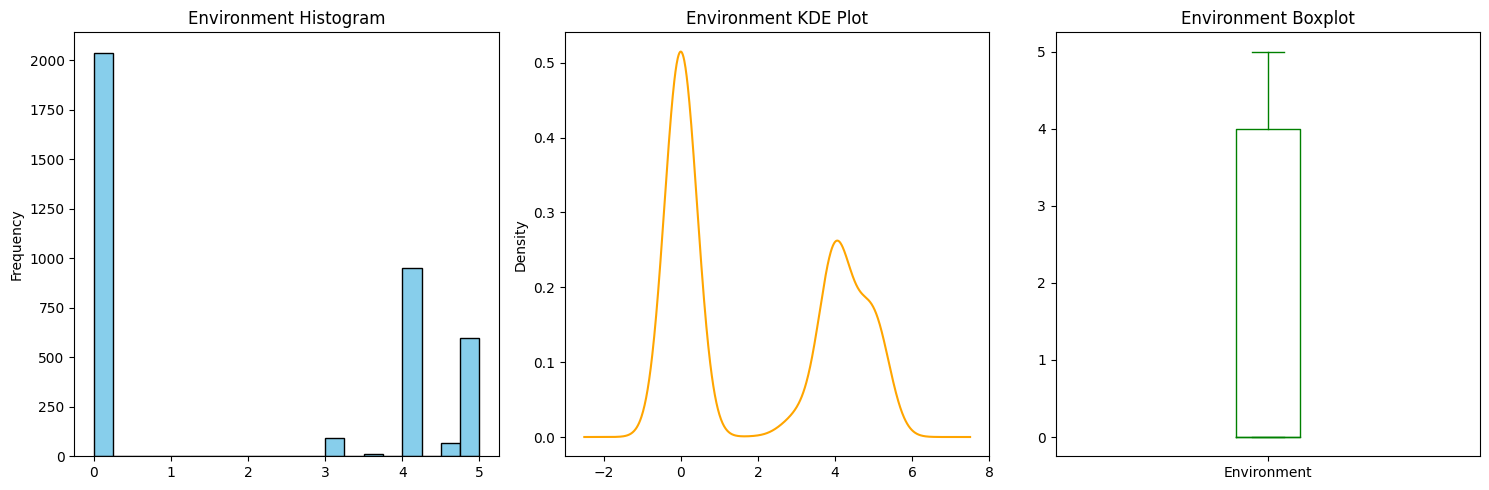


Skewness of Environment: 0.26
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Safety':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Safety, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


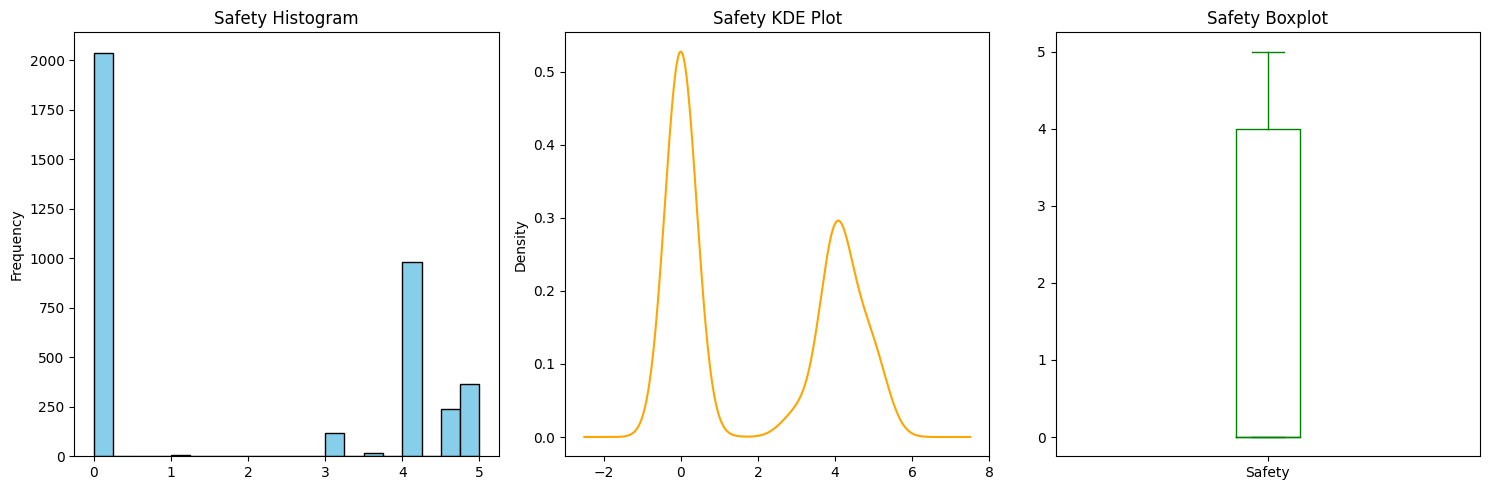


Skewness of Safety: 0.25
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Lifestyle':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Lifestyle, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


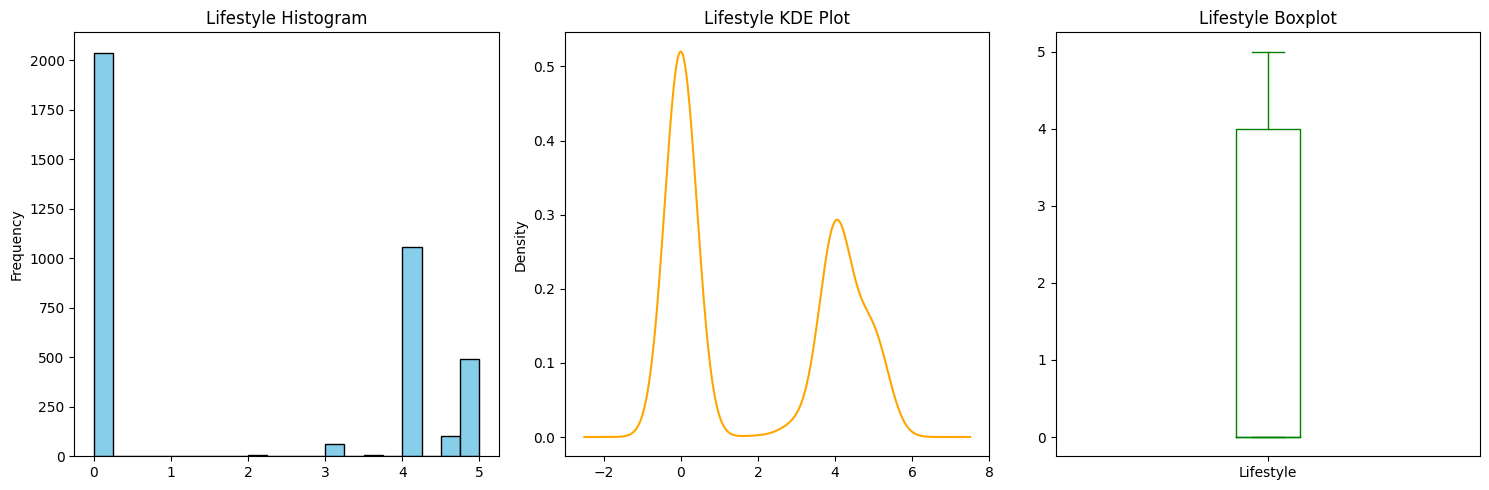


Skewness of Lifestyle: 0.25
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Connectivity':

count   3764
mean       4
std        1
min        0
25%        4
50%        4
75%        5
max        5
Name: Connectivity, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


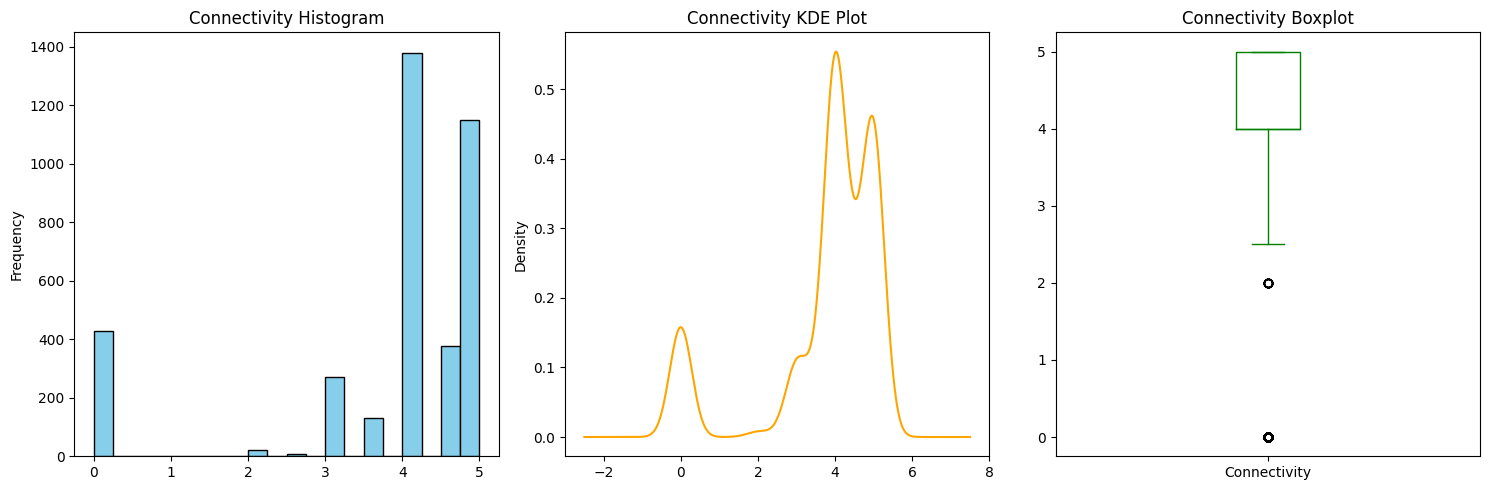


Skewness of Connectivity: -1.74
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 447
Outliers are outside the range (2.50, 6.50)
        price  bedRoom  bathroom  balcony        facing property_type  \
2299 18200000        3         2        2          East          flat   
3313 62500000        3         3        0  undetermined         house   
3759 55000000        4         4        3    North-East         house   
3057 11000000        4         3        1    North-East         house   
2275  5000000        2         2        1         North          flat   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
2299          4                      0                    18               0   
3313          1                      0                     0               0   
3759          2                      3                    18              13   
3057          2                      0                     0               0   
22

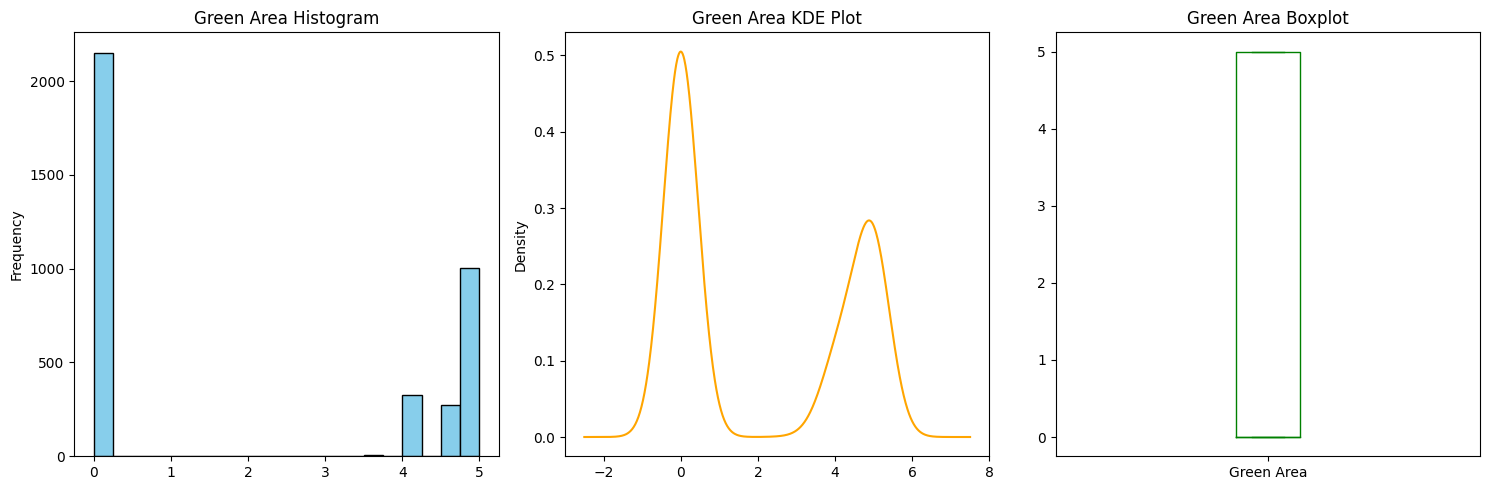


Skewness of Green Area: 0.33
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Amenities':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Amenities, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


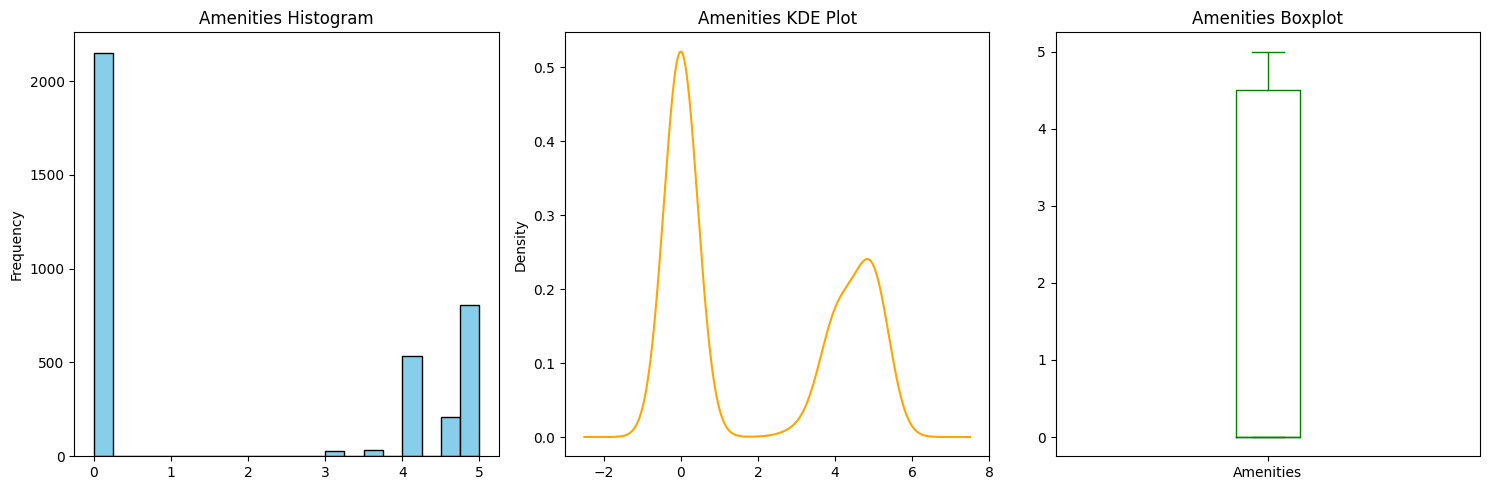


Skewness of Amenities: 0.35
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Management':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Management, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


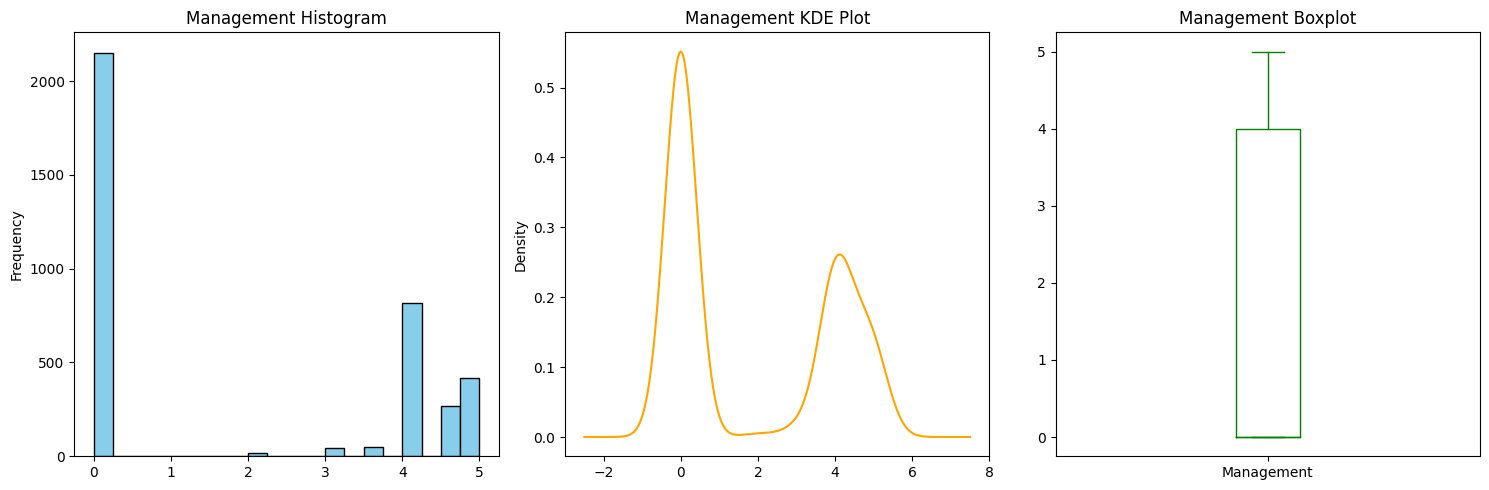


Skewness of Management: 0.37
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'Construction':

count   3764
mean       2
std        2
min        0
25%        0
50%        0
75%        4
max        5
Name: Construction, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


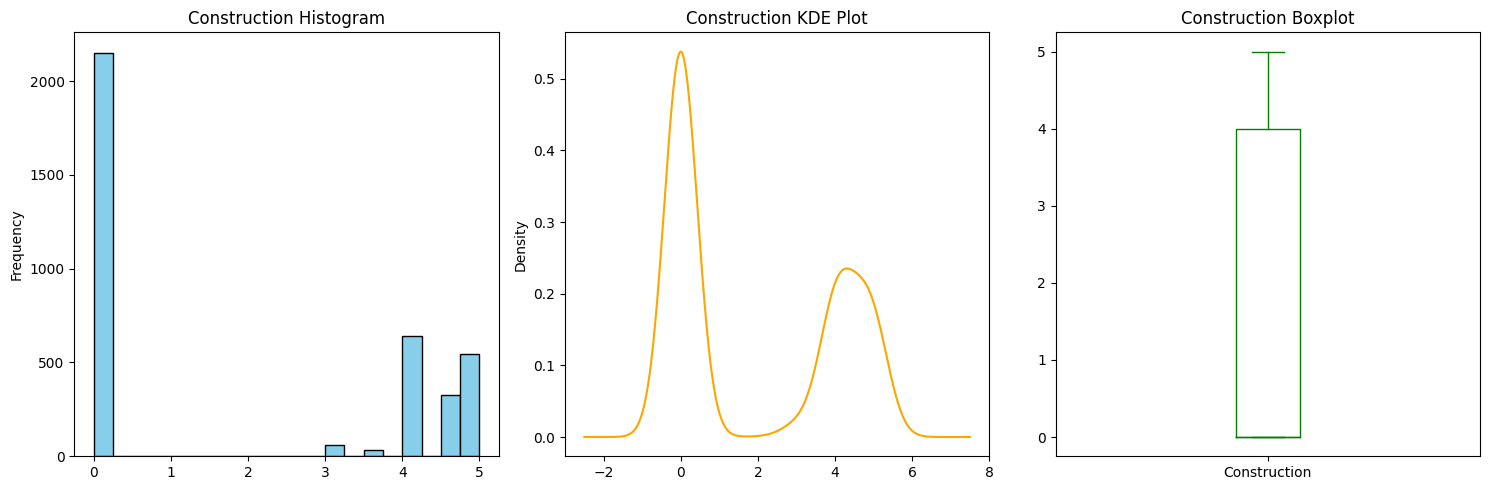


Skewness of Construction: 0.36
The data is approximately normally distributed (skewness near 0).

No outliers detected.

Conclusion:
- The data contains 0.00% missing values.
- The data is approximately normally distributed.


==

Univariate Analysis for 'nearbyLocations_count':

count   3764
mean      19
std       16
min        0
25%        9
50%       11
75%       23
max       50
Name: nearbyLocations_count, dtype: float64

Remarks:
- Min value is 0.0. There might be children or data entry issues.


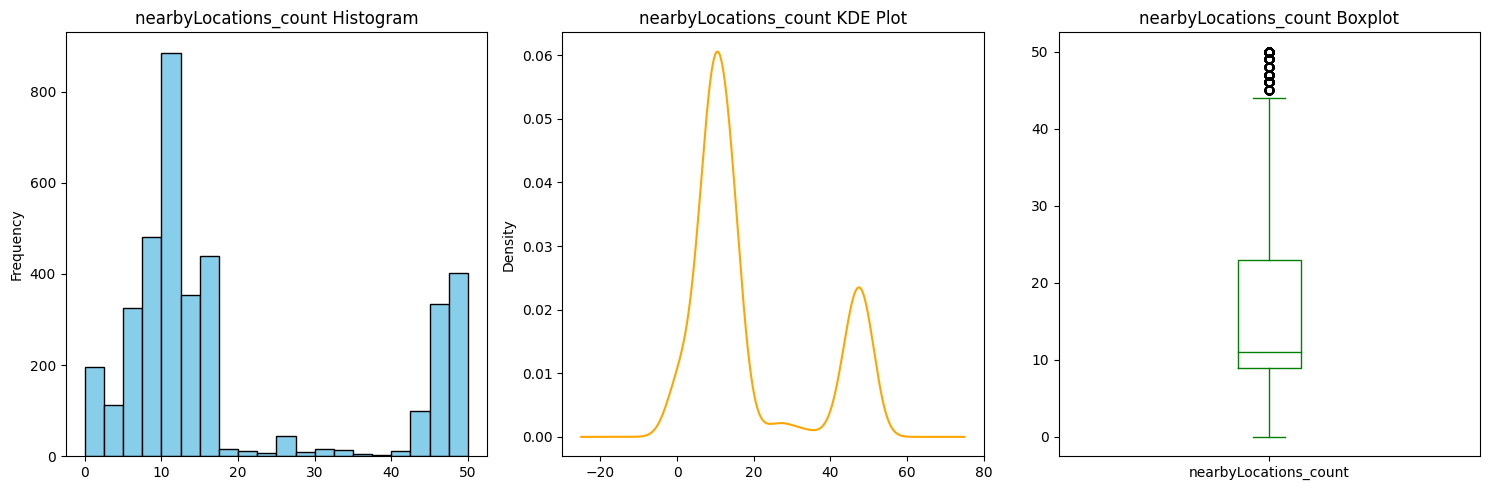


Skewness of nearbyLocations_count: 1.06
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 736
Outliers are outside the range (-12.00, 44.00)
        price  bedRoom  bathroom  balcony        facing property_type  \
3046 17000000        1         1        2  undetermined         house   
2379 43000000        4         5        3          East          flat   
3211 15000000       10         7        3          East         house   
3260  3800000        3         3        3  undetermined         house   
270  14900000        3         2        3    South-East          flat   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3046          1                      0                     0               0   
2379          4                      3                     0              15   
3211          4                      0                     0               0   
3260          3                      0                     0           

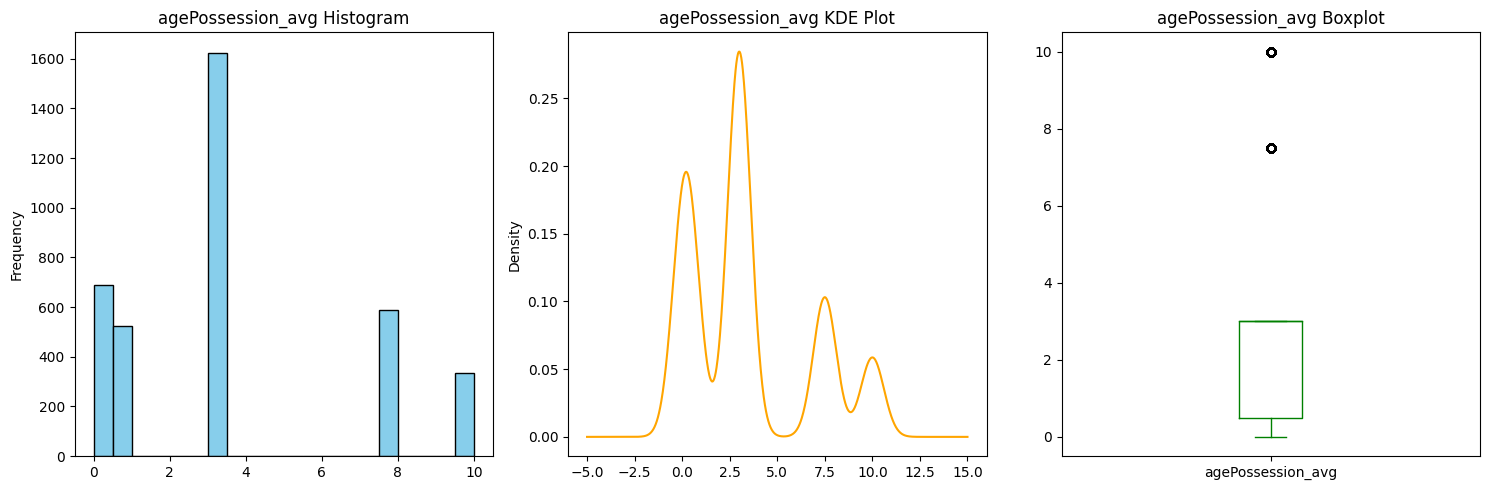


Skewness of agePossession_avg: 0.80
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 924
Outliers are outside the range (-3.25, 6.75)
         price  bedRoom  bathroom  balcony        facing property_type  \
3467 105500000        5         5        3  undetermined         house   
3413  65000000        9         9        3          West         house   
3487 150000000        5         5        3          West         house   
147   11000000        3         2        3  undetermined          flat   
3141   5000000        2         1        2  undetermined         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3467          2                      2                     0               7   
3413          3                      4                    18              23   
3487          2                      3                    18              19   
147           5                      0                     0           

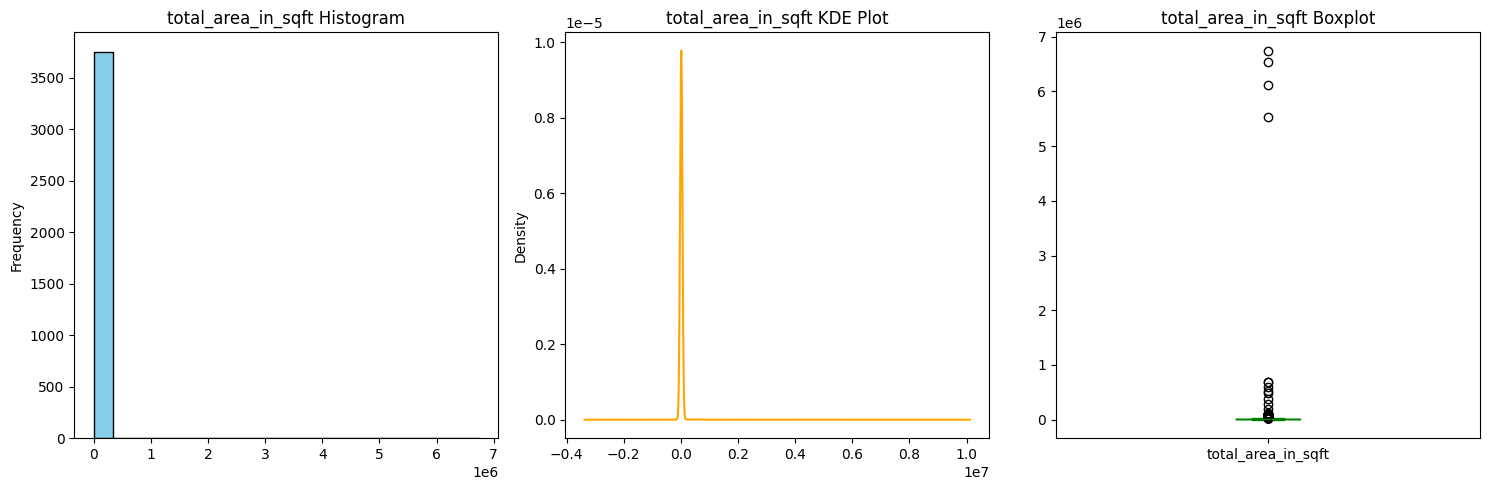


Skewness of total_area_in_sqft: 30.23
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 152
Outliers are outside the range (-9136.61, 33885.10)
         price  bedRoom  bathroom  balcony        facing property_type  \
982   50000000        4         4        3    North-East          flat   
2884 170000000        5         8        3    North-East         house   
481   35500000        5         6        3         North          flat   
3080  13500000       10         6        3  undetermined         house   
2319   3500000        2         2        2  undetermined          flat   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
982           2                      4                    18              31   
2884          3                      4                    18              25   
481          11                      4                    18              27   
3080          3                      0                     0  

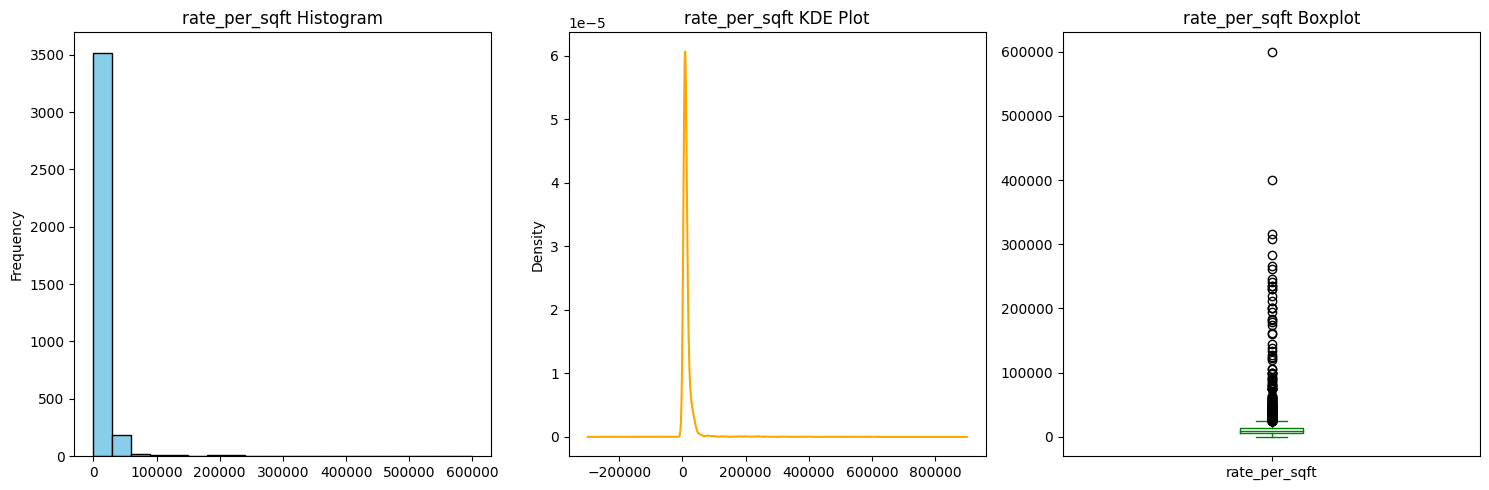


Skewness of rate_per_sqft: 11.01
The data is skewed, suggesting a non-normal distribution.

Outliers detected: 375
Outliers are outside the range (-3677.75, 24256.25)
         price  bedRoom  bathroom  balcony        facing property_type  \
3420 120000000        5         6        3    North-East         house   
3063  85000000       12        12        3         North         house   
2876  74900000       12        12        3    South-East         house   
2969   7500000        2         1        0  undetermined         house   
2859  70000000        5         5        3    North-East         house   

      floor_nbr  additional_room_count  furnishDetails_count  features_count  \
3420          4                      2                    18               5   
3063          4                      0                    18              18   
2876          4                      3                    18               8   
2969          1                      0                     0       

In [43]:
for i in numerical_cols:
    univariate_analysis(df, i)
    print("==")

#### categorical

In [44]:
def categorical_univariate_analysis(df, col_name):
    """
    Perform univariate analysis on a categorical column in the DataFrame.
    Prints frequency counts, remarks, and conclusions.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    col_name (str): The name of the categorical column to analyze.
    """
    
    # Step 1: Count the frequency of each category
    value_counts = df[col_name].value_counts()
    print(f"\nUnivariate Analysis for '{col_name}':\n")
    print(value_counts)
    
    # Step 2: Remarks based on the frequency distribution
    remarks = []
    total_count = df[col_name].shape[0]
    
    # Check if any category has more than 50% of the data
    for category, count in value_counts.items():
        percentage = (count / total_count) * 100
        if percentage > 50:
            remarks.append(f"More than 50% of the values are in the '{category}' category.")
    
    if len(remarks) == 0:
        remarks.append("The data is fairly distributed across categories.")
    
    print("\nRemarks:")
    for remark in remarks:
        print(f"- {remark}")
    
    # Step 3: Plotting (Bar chart, Pie chart)
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    
    # Bar Chart
    value_counts.plot(kind='bar', ax=axes[0], color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col_name} Frequency Distribution (Bar Chart)')
    axes[0].set_ylabel('Count')
    
    # Pie Chart
    value_counts.plot(kind='pie', ax=axes[1], autopct='%0.1f%%', colors=['#ff9999', '#66b3ff'], startangle=90)
    axes[1].set_title(f'{col_name} Frequency Distribution (Pie Chart)')
    axes[1].set_ylabel('')  # Remove y-label from pie chart
    
    plt.tight_layout()
    plt.show()
    
    # Step 4: Check for missing values
    missing_data = df[col_name].isnull().sum()
    missing_percentage = (missing_data / total_count) * 100
    
    print(f"\nMissing Values: {missing_data} ({missing_percentage:.2f}%)")
    
    # Step 5: Conclusion
    conclusion = []
    
    if missing_percentage > 0:
        conclusion.append(f"The data contains {missing_percentage:.2f}% missing values.")
    else:
        conclusion.append("No missing values.")
    
    # Add more conclusions based on the frequency distribution
    if len(remarks) == 0:
        conclusion.append("The data is fairly distributed across categories.")
    
    print("\nConclusion:")
    for point in conclusion:
        print(f"- {point}")
    
    print("\n" + "="*50 + "\n")


Univariate Analysis for 'facing':

facing
undetermined    1083
East             644
North-East       639
North            399
West             240
South            234
North-West       199
South-East       176
South-West       150
Name: count, dtype: int64

Remarks:
- The data is fairly distributed across categories.


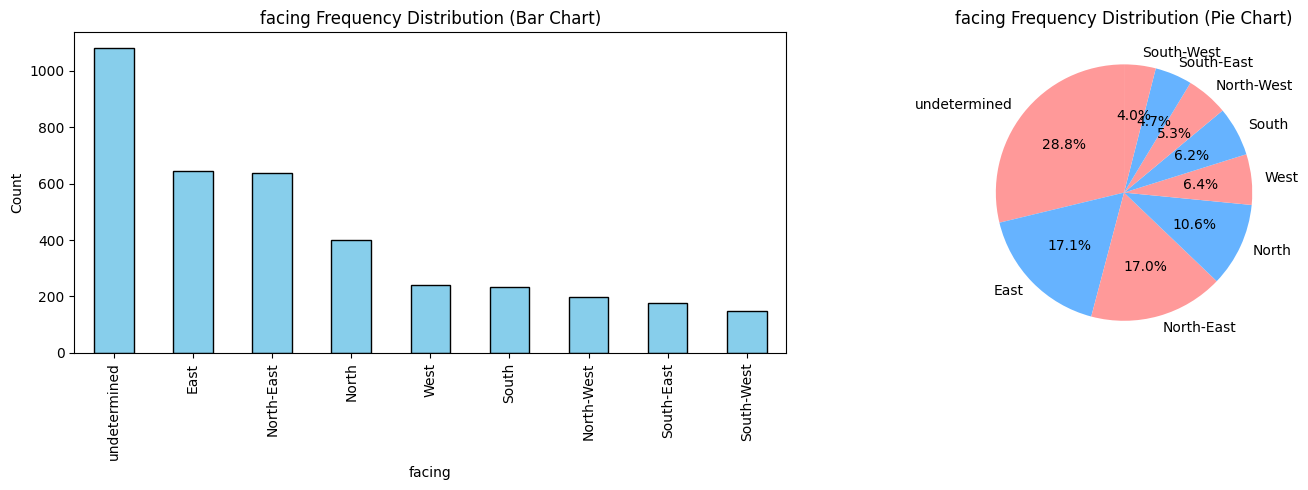


Missing Values: 0 (0.00%)

Conclusion:
- No missing values.



Univariate Analysis for 'property_type':

property_type
flat     2835
house     929
Name: count, dtype: int64

Remarks:
- More than 50% of the values are in the 'flat' category.


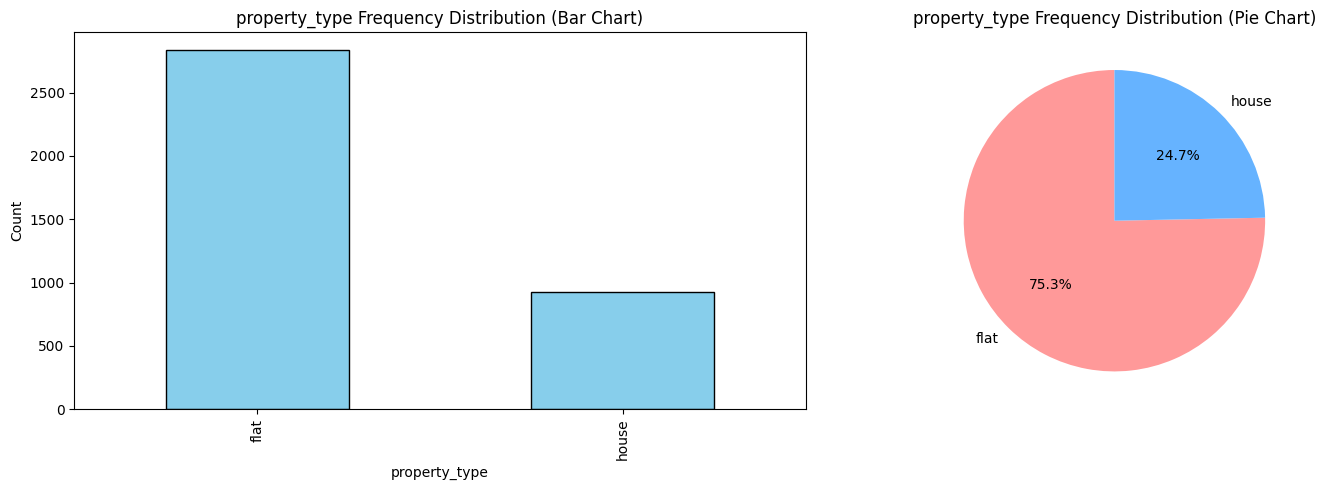


Missing Values: 0 (0.00%)

Conclusion:
- No missing values.



Univariate Analysis for 'prop_location':

prop_location
 Sohna                      155
 Sector 102 Gurgaon         106
 Sector 85 Gurgaon          106
 Sector 92 Gurgaon          100
 Sector 81 Gurgaon           88
                           ... 
 BPTP                         1
 Pataudi Road                 1
 Lucknow                      1
 Part 3 Sector 5 Gurgaon      1
 Khandsa                      1
Name: count, Length: 298, dtype: int64

Remarks:
- The data is fairly distributed across categories.


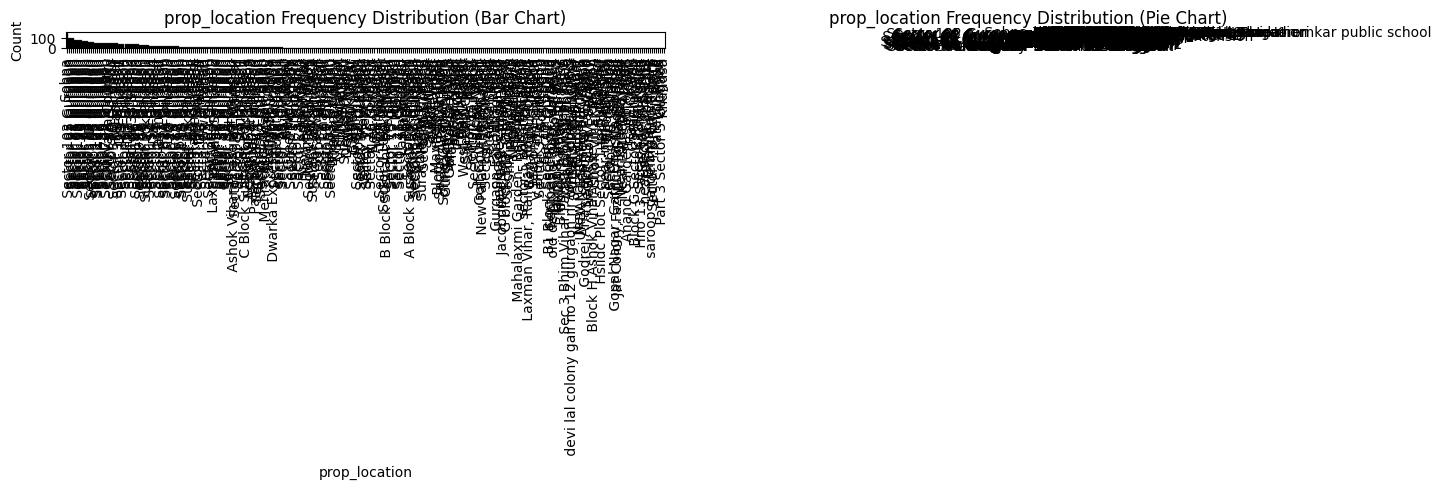


Missing Values: 0 (0.00%)

Conclusion:
- No missing values.




In [45]:
for i in categorical_cols:
    categorical_univariate_analysis(df, i)

### Bivariate Analysis

- Compare target column with another cols

#### Numerical - Numerical

In [46]:
def bivariate_numerical_analysis(df, col1, col2):
    """
    Perform bivariate analysis for two numerical columns in the DataFrame.
    It generates visualizations (scatter plot, 2D hist plot, 2D KDE plot),
    checks the correlation coefficient, and provides insights on their relationship.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    col1 (str): The name of the first numerical column.
    col2 (str): The name of the second numerical column.
    """
    
    print(f"\nBivariate Analysis for '{col1}' and '{col2}':\n")
    
    # Step 1: Scatter Plot
    plt.figure(figsize=(6, 5))
    sns.scatterplot(data=df, x=col1, y=col2, color='b', alpha=0.6)
    plt.title(f'Scatter Plot between {col1} and {col2}')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.show()
    
    # Step 2: 2D Histplot
    plt.figure(figsize=(6, 5))
    sns.histplot(data=df, x=col1, y=col2, bins=30, cmap='Blues', pthresh=.1, cbar=True)
    plt.title(f'2D Histogram between {col1} and {col2}')
    plt.show()
    
    # Step 3: 2D KDE Plot (Kernel Density Estimate)
    plt.figure(figsize=(6, 5))
    sns.kdeplot(data=df, x=col1, y=col2, cmap='Blues', fill=True)
    plt.title(f'2D KDE Plot between {col1} and {col2}')
    plt.show()
    
    # Step 4: Correlation Coefficient
    correlation = df[[col1, col2]].corr().iloc[0, 1]
    print(f"\nCorrelation Coefficient between {col1} and {col2}: {correlation:.2f}")
    
    # Step 5: Insights based on correlation coefficient
    if correlation > 0.8:
        print(f"The two variables have a strong positive correlation ({correlation:.2f}).")
    elif correlation > 0.5:
        print(f"The two variables have a moderate positive correlation ({correlation:.2f}).")
    elif correlation > 0.2:
        print(f"The two variables have a weak positive correlation ({correlation:.2f}).")
    elif correlation > -0.2:
        print(f"The two variables have a very weak correlation ({correlation:.2f}).")
    elif correlation > -0.5:
        print(f"The two variables have a moderate negative correlation ({correlation:.2f}).")
    else:
        print(f"The two variables have a strong negative correlation ({correlation:.2f}).")
    
    # Step 6: Conclusion
    conclusion = []
    if correlation > 0.8:
        conclusion.append(f"{col1} and {col2} are strongly positively correlated.")
    elif correlation < -0.8:
        conclusion.append(f"{col1} and {col2} are strongly negatively correlated.")
    else:
        conclusion.append(f"The correlation between {col1} and {col2} is weak to moderate.")
    
    print("\nConclusion:")
    for point in conclusion:
        print(f"- {point}")
    
    print("\n" + "="*50 + "\n")



Bivariate Analysis for 'price' and 'bedRoom':



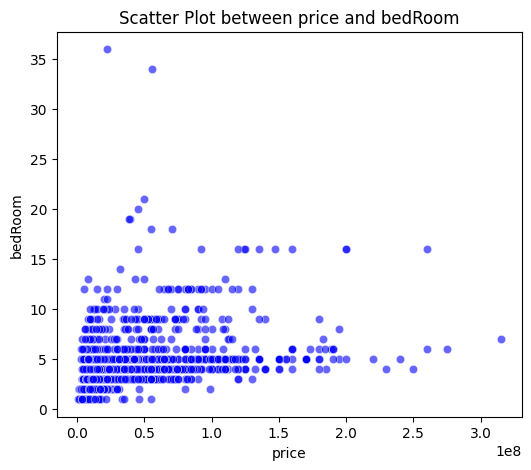

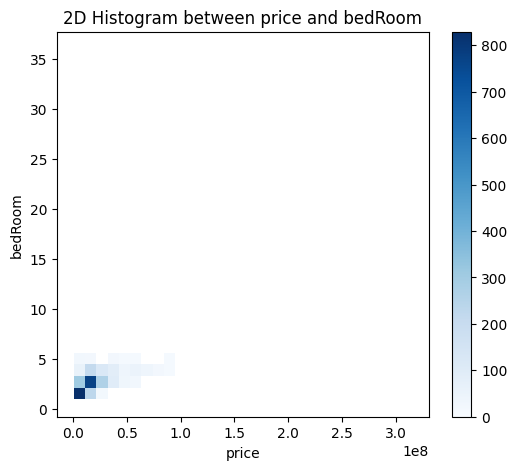

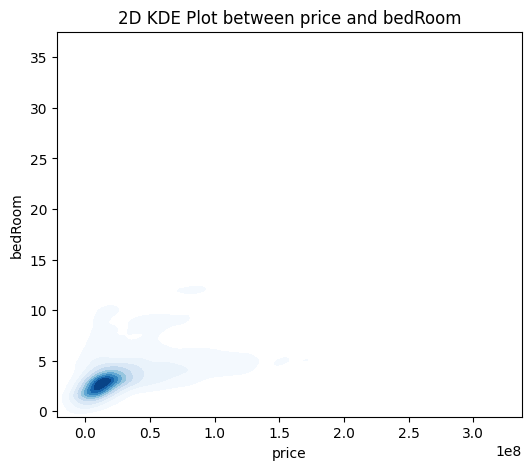


Correlation Coefficient between price and bedRoom: 0.48
The two variables have a weak positive correlation (0.48).

Conclusion:
- The correlation between price and bedRoom is weak to moderate.



Bivariate Analysis for 'price' and 'bathroom':



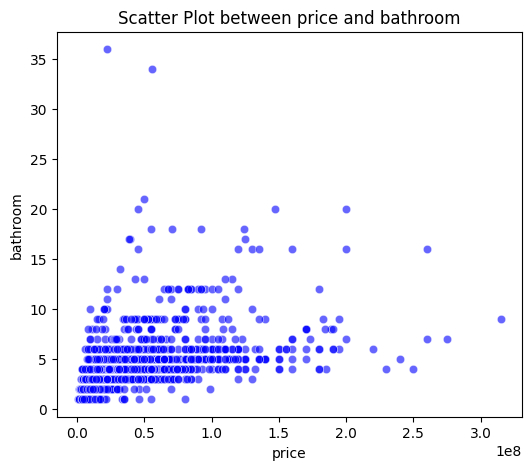

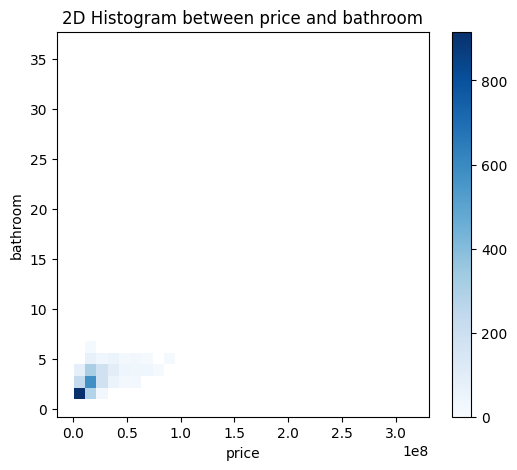

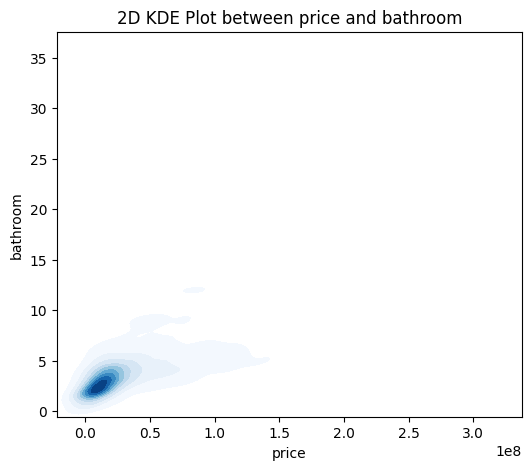


Correlation Coefficient between price and bathroom: 0.56
The two variables have a moderate positive correlation (0.56).

Conclusion:
- The correlation between price and bathroom is weak to moderate.



Bivariate Analysis for 'price' and 'balcony':



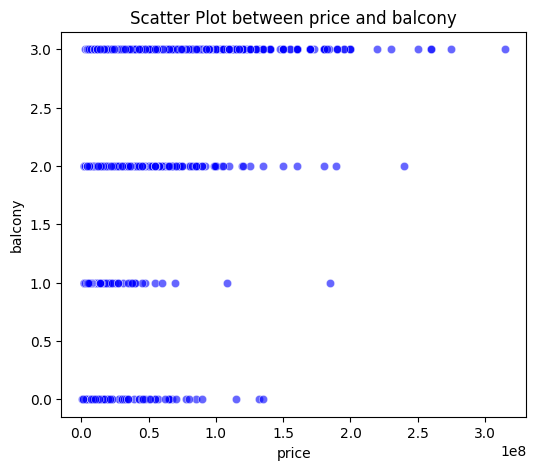

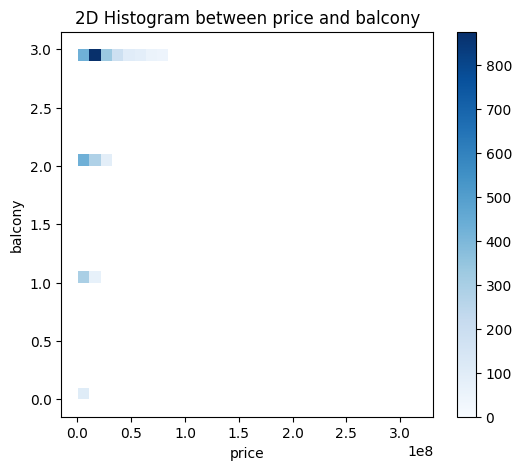

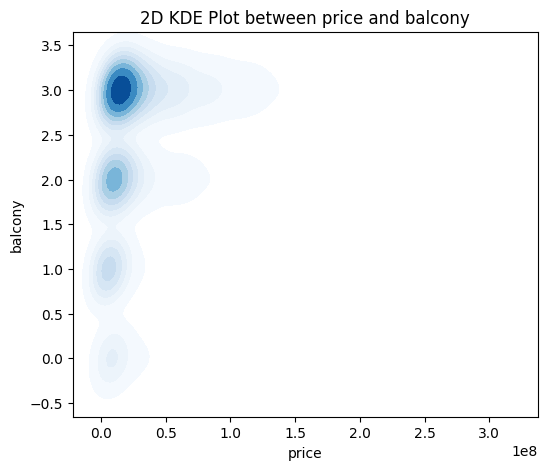


Correlation Coefficient between price and balcony: 0.23
The two variables have a weak positive correlation (0.23).

Conclusion:
- The correlation between price and balcony is weak to moderate.



Bivariate Analysis for 'price' and 'floor_nbr':



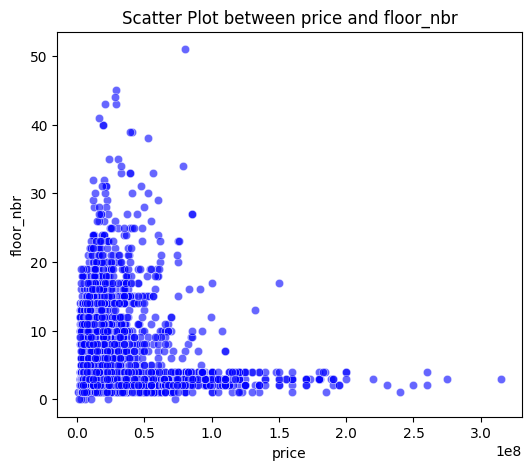

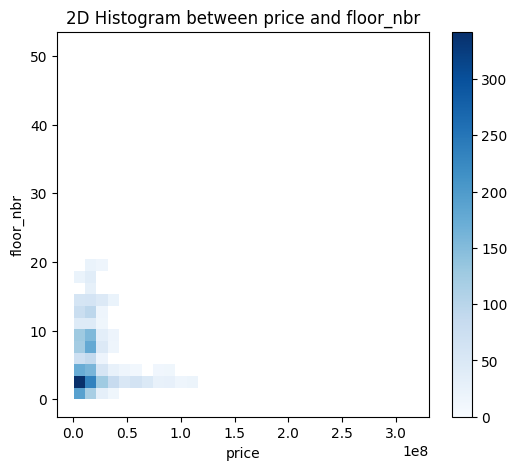

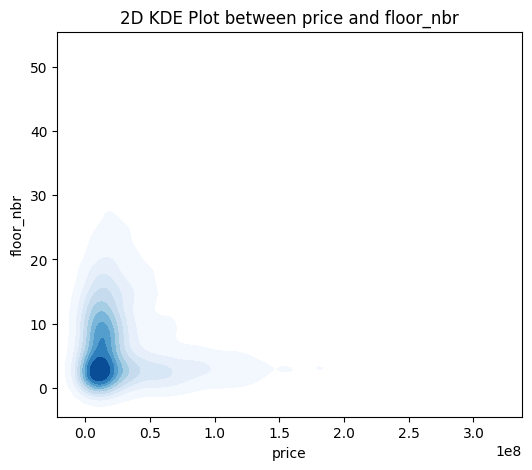


Correlation Coefficient between price and floor_nbr: -0.10
The two variables have a very weak correlation (-0.10).

Conclusion:
- The correlation between price and floor_nbr is weak to moderate.



Bivariate Analysis for 'price' and 'additional_room_count':



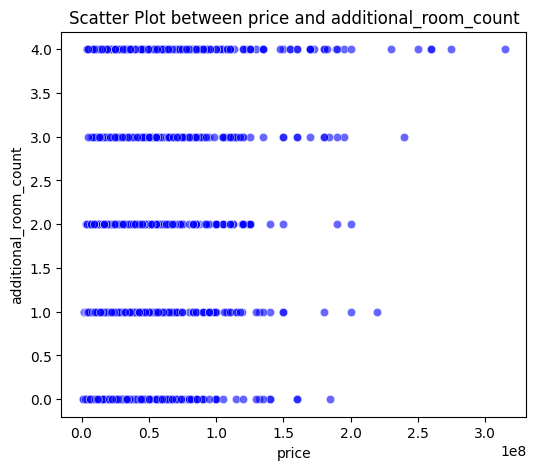

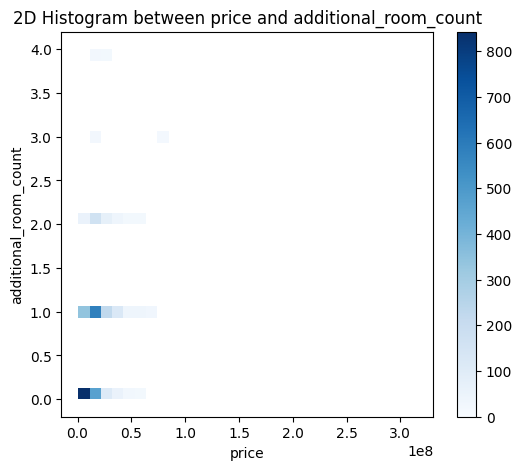

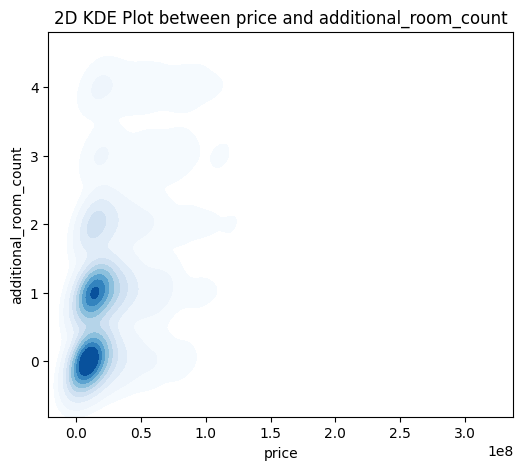


Correlation Coefficient between price and additional_room_count: 0.48
The two variables have a weak positive correlation (0.48).

Conclusion:
- The correlation between price and additional_room_count is weak to moderate.



Bivariate Analysis for 'price' and 'furnishDetails_count':



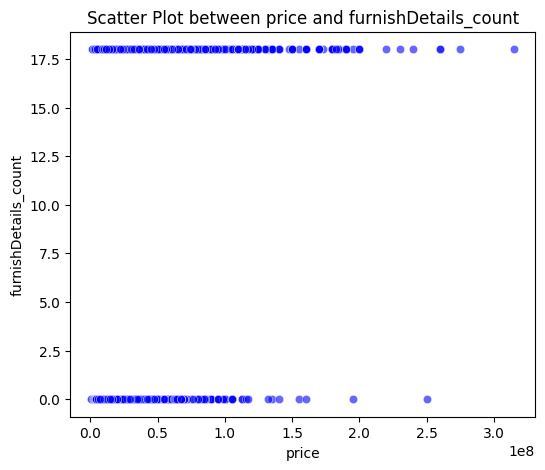

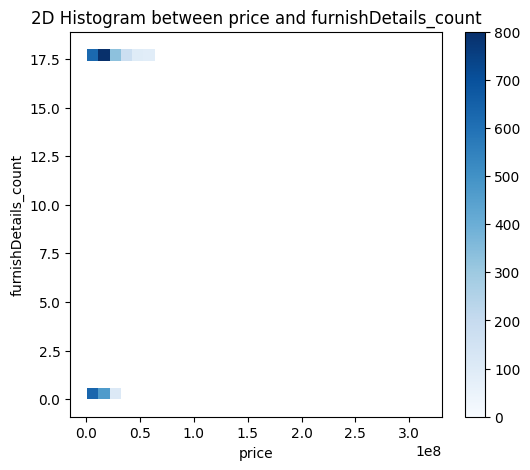

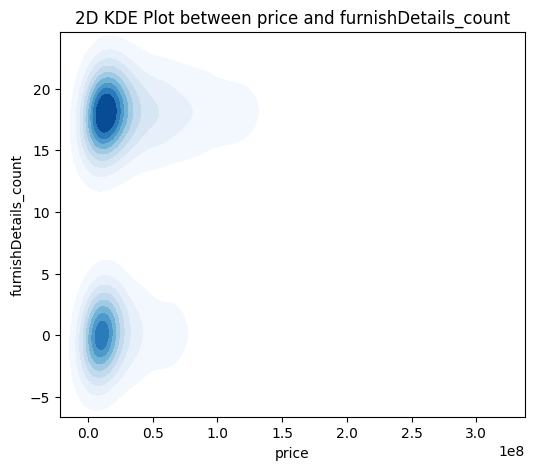


Correlation Coefficient between price and furnishDetails_count: 0.19
The two variables have a very weak correlation (0.19).

Conclusion:
- The correlation between price and furnishDetails_count is weak to moderate.



Bivariate Analysis for 'price' and 'features_count':



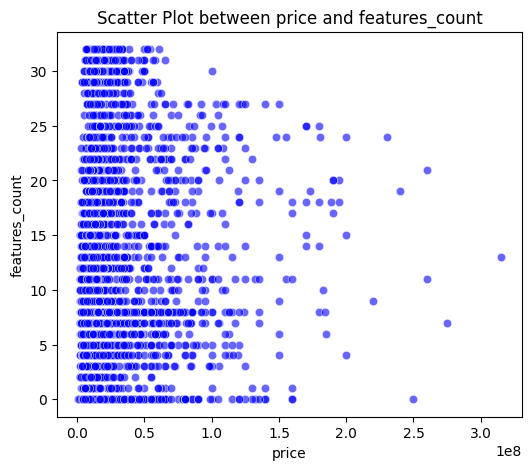

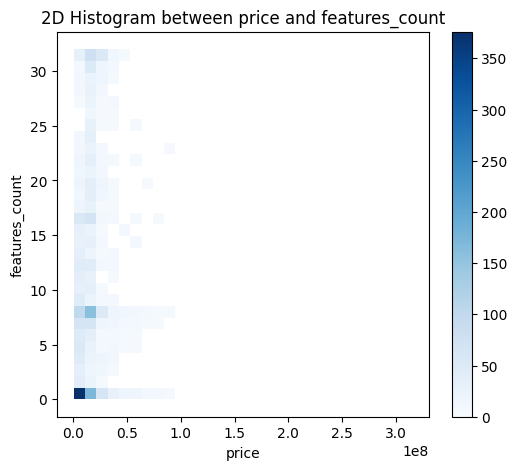

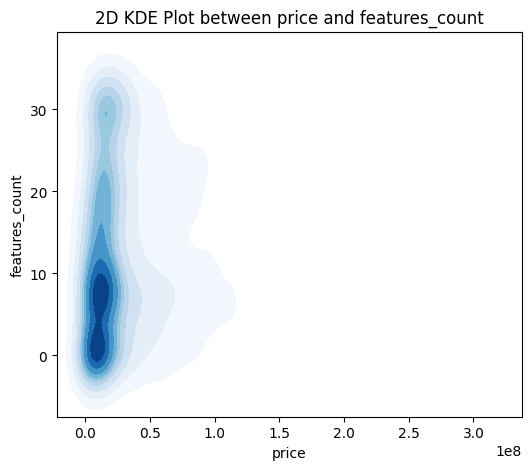


Correlation Coefficient between price and features_count: 0.08
The two variables have a very weak correlation (0.08).

Conclusion:
- The correlation between price and features_count is weak to moderate.



Bivariate Analysis for 'price' and 'Environment':



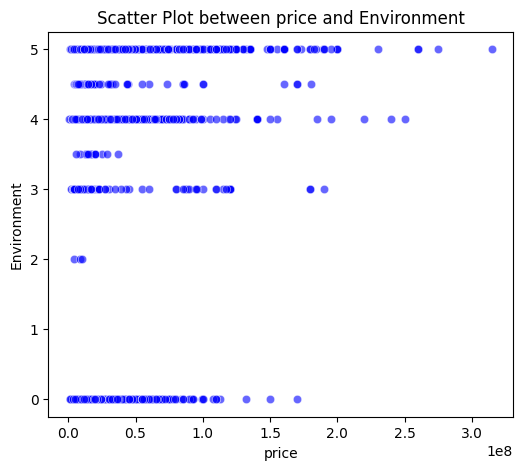

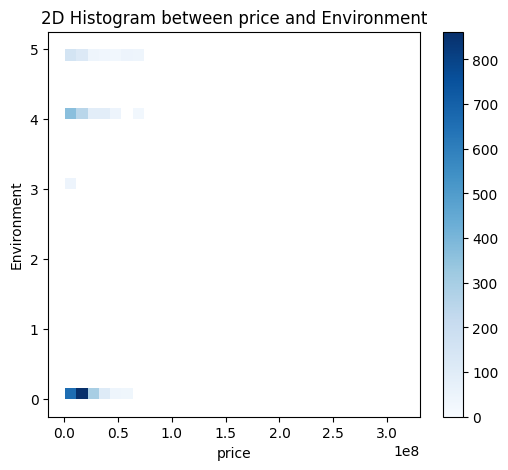

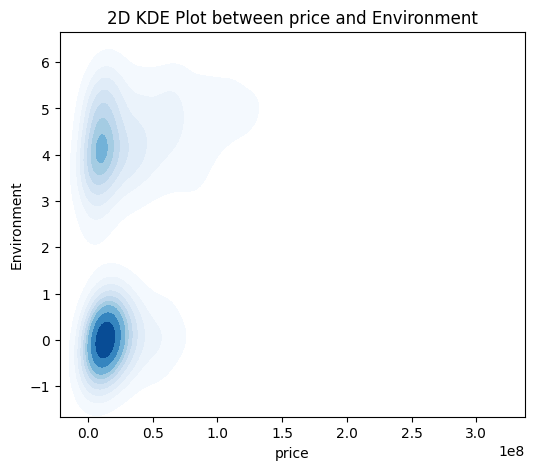


Correlation Coefficient between price and Environment: 0.29
The two variables have a weak positive correlation (0.29).

Conclusion:
- The correlation between price and Environment is weak to moderate.



Bivariate Analysis for 'price' and 'Safety':



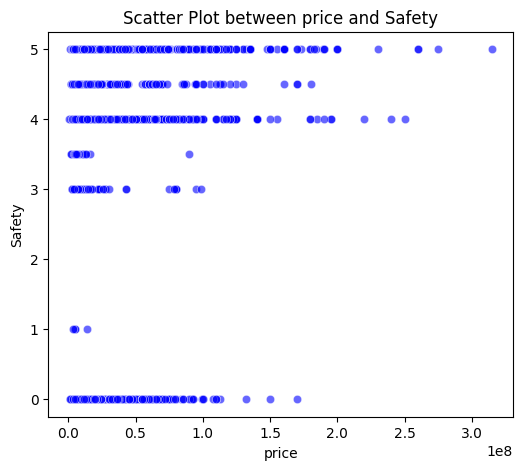

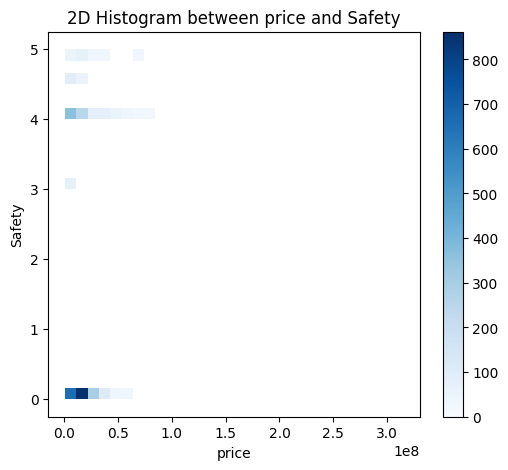

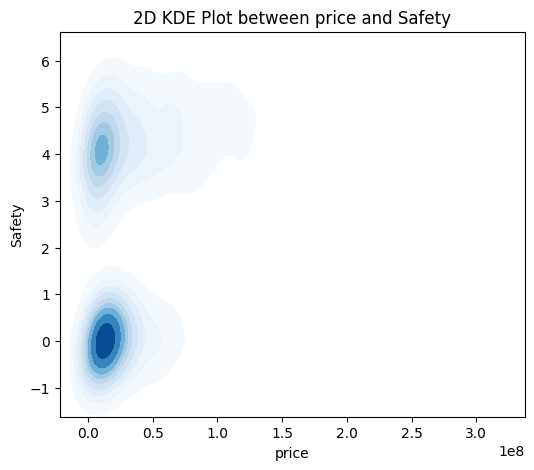


Correlation Coefficient between price and Safety: 0.30
The two variables have a weak positive correlation (0.30).

Conclusion:
- The correlation between price and Safety is weak to moderate.



Bivariate Analysis for 'price' and 'Lifestyle':



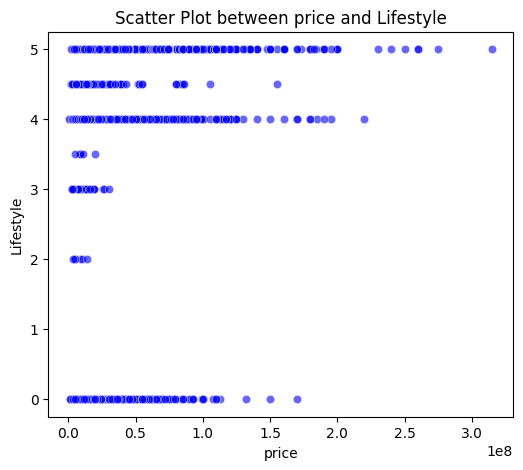

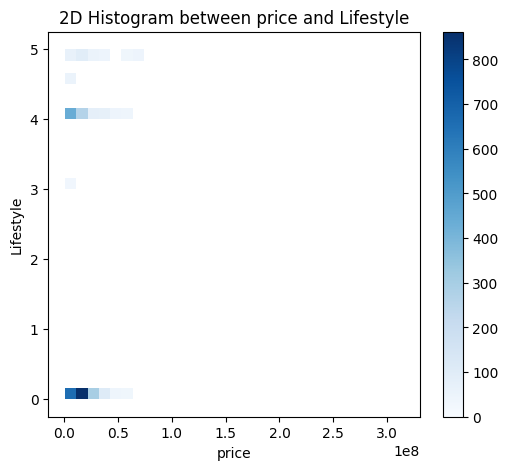

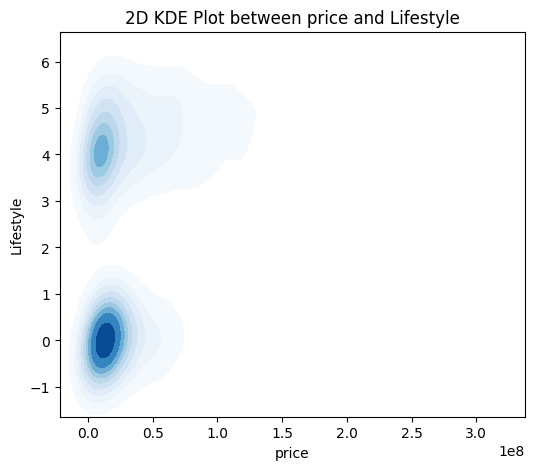


Correlation Coefficient between price and Lifestyle: 0.30
The two variables have a weak positive correlation (0.30).

Conclusion:
- The correlation between price and Lifestyle is weak to moderate.



Bivariate Analysis for 'price' and 'Connectivity':



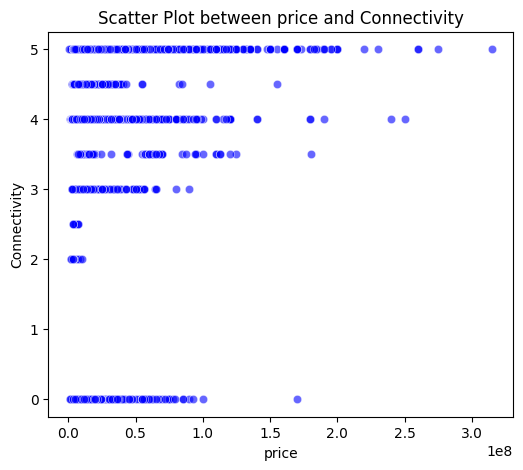

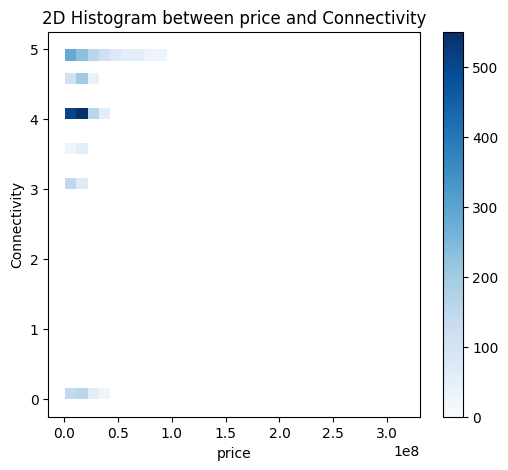

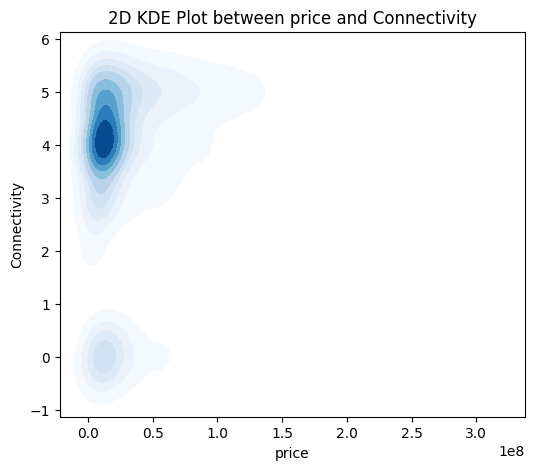


Correlation Coefficient between price and Connectivity: 0.17
The two variables have a very weak correlation (0.17).

Conclusion:
- The correlation between price and Connectivity is weak to moderate.



Bivariate Analysis for 'price' and 'Green Area':



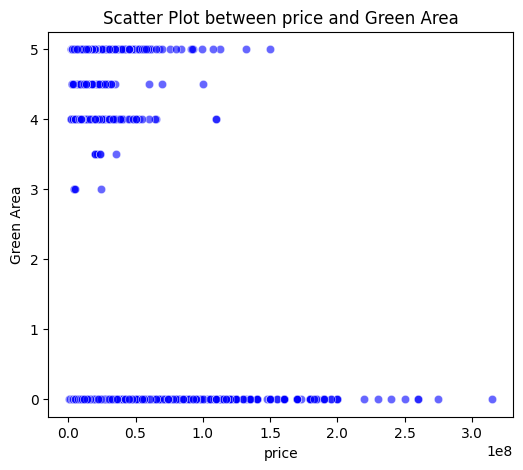

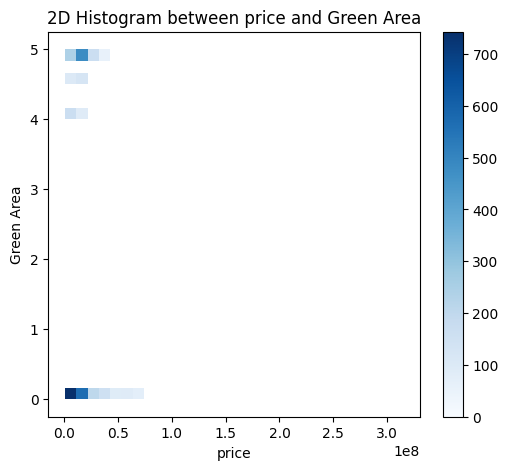

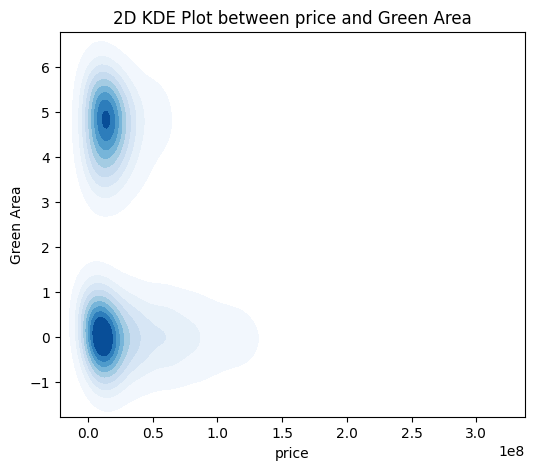


Correlation Coefficient between price and Green Area: -0.21
The two variables have a moderate negative correlation (-0.21).

Conclusion:
- The correlation between price and Green Area is weak to moderate.



Bivariate Analysis for 'price' and 'Amenities':



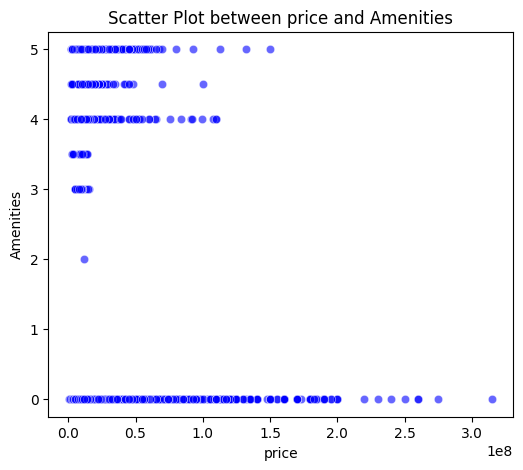

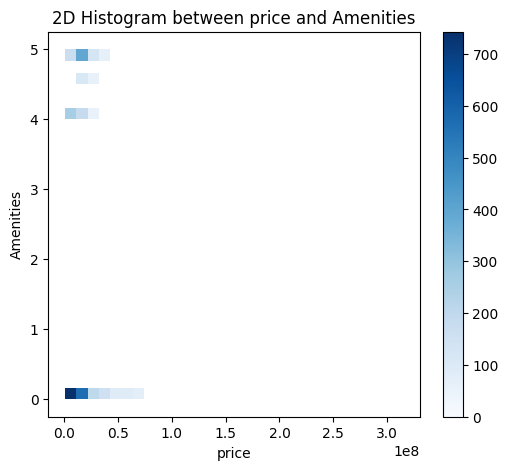

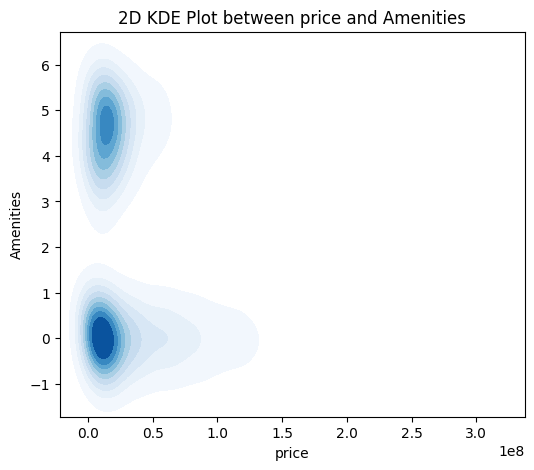


Correlation Coefficient between price and Amenities: -0.21
The two variables have a moderate negative correlation (-0.21).

Conclusion:
- The correlation between price and Amenities is weak to moderate.



Bivariate Analysis for 'price' and 'Management':



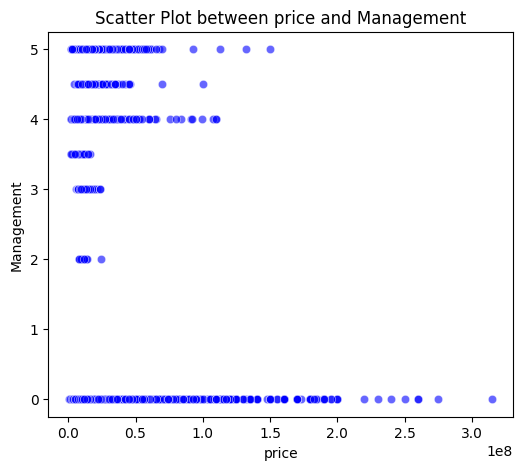

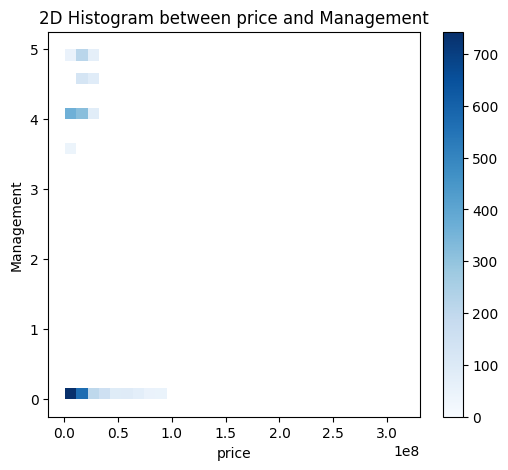

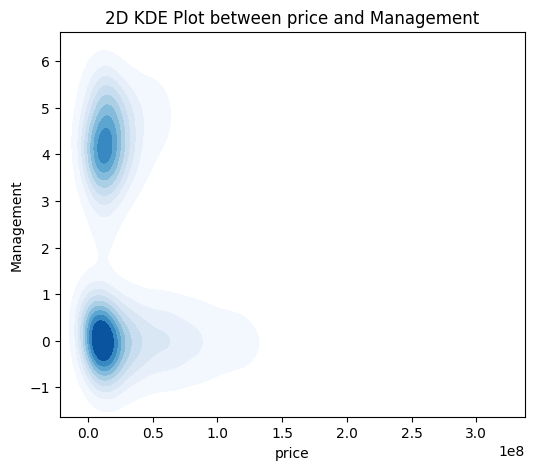


Correlation Coefficient between price and Management: -0.20
The two variables have a very weak correlation (-0.20).

Conclusion:
- The correlation between price and Management is weak to moderate.



Bivariate Analysis for 'price' and 'Construction':



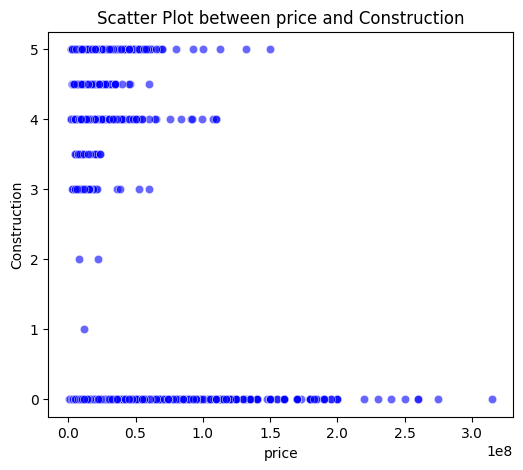

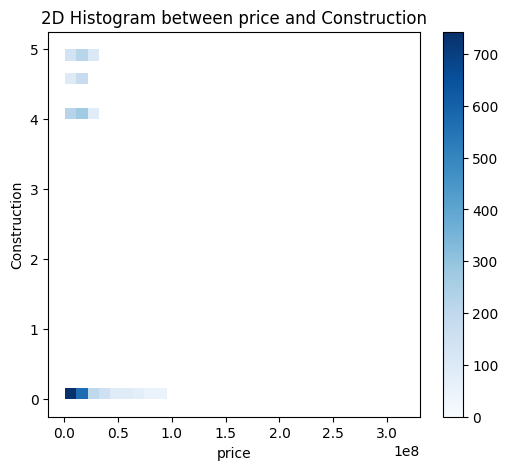

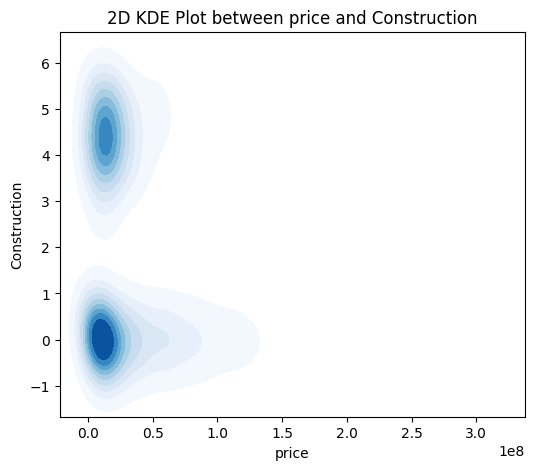


Correlation Coefficient between price and Construction: -0.21
The two variables have a moderate negative correlation (-0.21).

Conclusion:
- The correlation between price and Construction is weak to moderate.



Bivariate Analysis for 'price' and 'nearbyLocations_count':



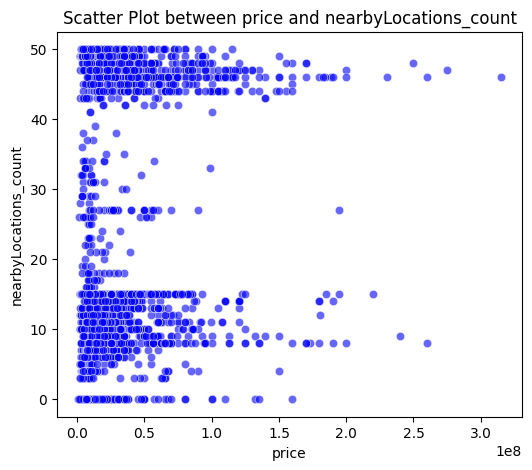

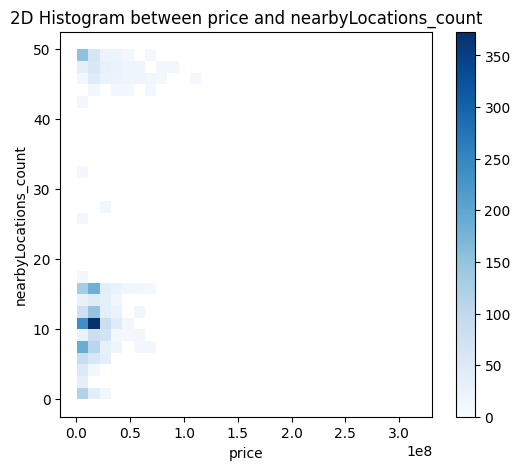

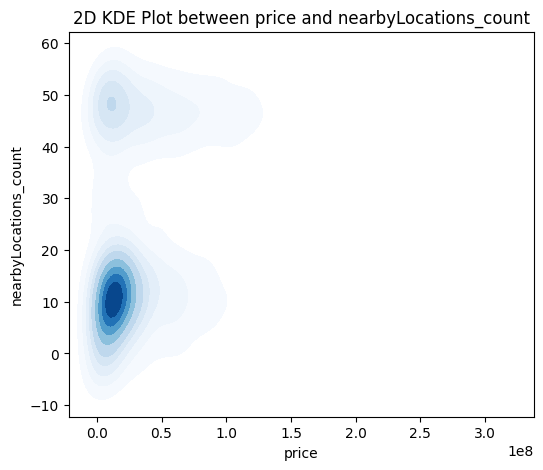


Correlation Coefficient between price and nearbyLocations_count: 0.26
The two variables have a weak positive correlation (0.26).

Conclusion:
- The correlation between price and nearbyLocations_count is weak to moderate.



Bivariate Analysis for 'price' and 'agePossession_avg':



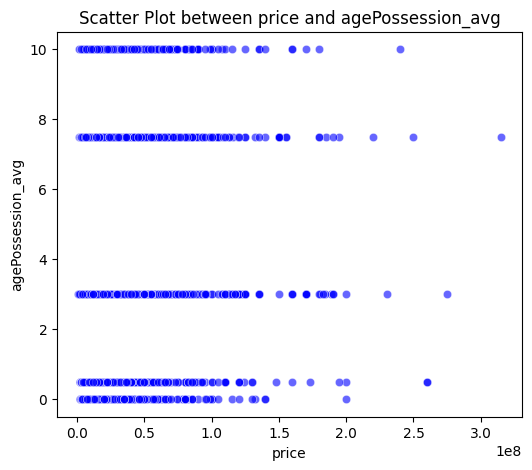

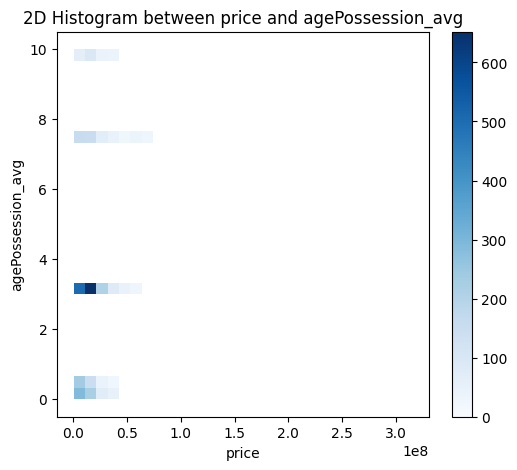

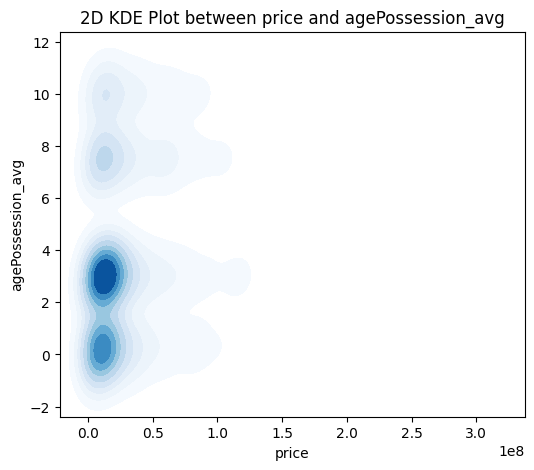


Correlation Coefficient between price and agePossession_avg: 0.17
The two variables have a very weak correlation (0.17).

Conclusion:
- The correlation between price and agePossession_avg is weak to moderate.



Bivariate Analysis for 'price' and 'total_area_in_sqft':



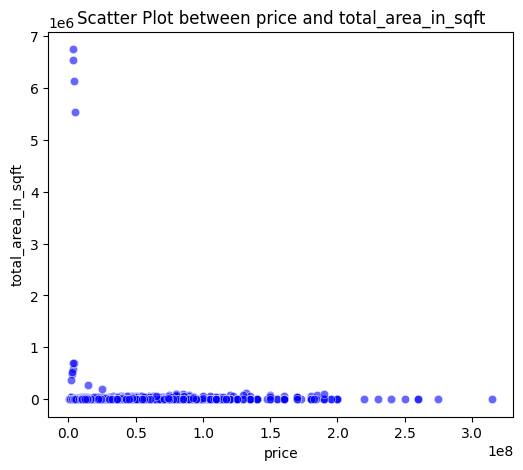

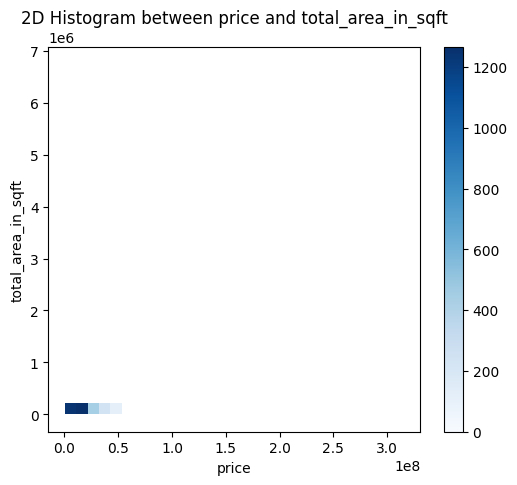

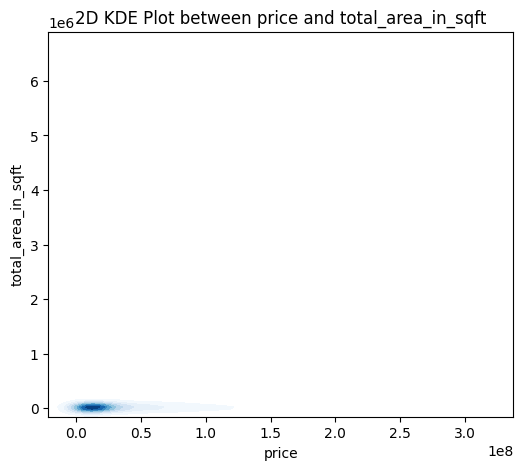


Correlation Coefficient between price and total_area_in_sqft: -0.02
The two variables have a very weak correlation (-0.02).

Conclusion:
- The correlation between price and total_area_in_sqft is weak to moderate.



Bivariate Analysis for 'price' and 'rate_per_sqft':



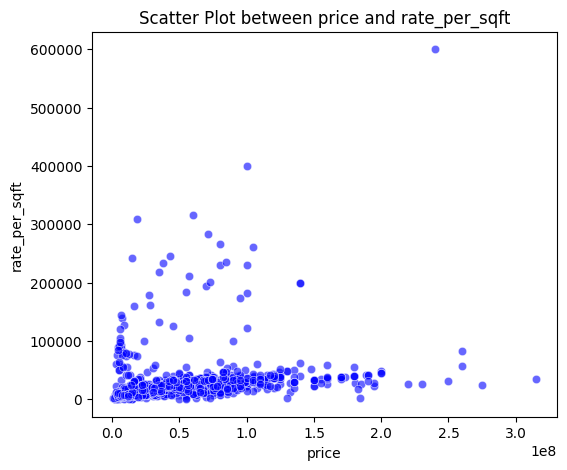

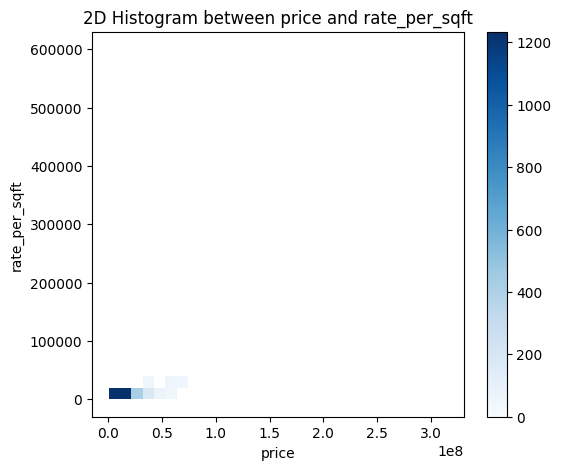

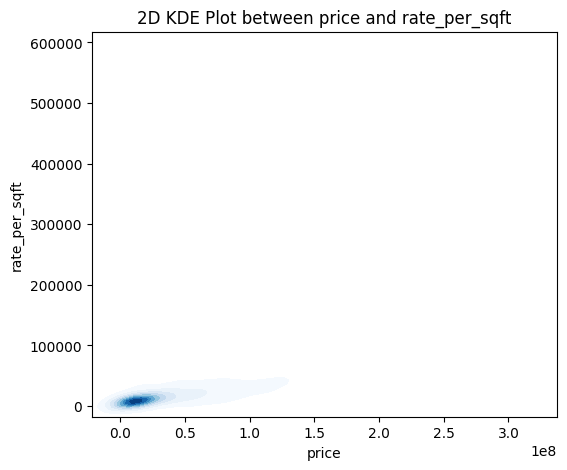


Correlation Coefficient between price and rate_per_sqft: 0.39
The two variables have a weak positive correlation (0.39).

Conclusion:
- The correlation between price and rate_per_sqft is weak to moderate.




In [48]:
for i in [col for col in numerical_cols if col != 'price']:
    bivariate_numerical_analysis(df, "price", i)

#### Numerical - Categorical

In [56]:
from scipy import stats

def bivariate_numerical_categorical_analysis(df, target_col, cat_col):
    """
    Perform bivariate analysis for a numerical target column and a categorical feature.
    It generates visualizations (box plot, violin plot, bar plot), checks statistical significance (ANOVA/t-test),
    and provides insights on their relationship.
    
    Parameters:
    df (pandas.DataFrame): The dataframe containing the data.
    target_col (str): The name of the numerical target column.
    cat_col (str): The name of the categorical column.
    """
    
    # Clean column names (strip spaces)
    df.columns = df.columns.str.strip()
    
    # Ensure target column is numeric
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')
    
    # Step 1: Box Plot
    plt.figure(figsize=(6, 5))
    sns.boxplot(data=df, x=cat_col, y=target_col)
    plt.title(f'Box Plot of {target_col} by {cat_col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.yticks(rotation=90)  # Rotate y-axis labels vertically
    plt.show()

    # Step 2: Violin Plot
    plt.figure(figsize=(6, 5))
    sns.violinplot(data=df, x=cat_col, y=target_col)
    plt.title(f'Violin Plot of {target_col} by {cat_col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.yticks(rotation=90)  # Rotate y-axis labels vertically
    plt.show()

    # Step 3: Bar Plot (Mean or Median of the Target by Category)
    plt.figure(figsize=(6, 5))
    sns.barplot(data=df, x=cat_col, y=target_col, estimator='mean', ci=None)
    plt.title(f'Mean of {target_col} by {cat_col}')
    plt.xticks(rotation=45)  # Rotate x-axis labels
    plt.yticks(rotation=90)  # Rotate y-axis labels vertically
    plt.show()

    # Step 4: Statistical Test (ANOVA or t-test)
    categories = df[cat_col].nunique()
    
    if categories > 2:
        # Perform One-Way ANOVA
        groups = [df[df[cat_col] == category][target_col] for category in df[cat_col].unique()]
        f_stat, p_value = stats.f_oneway(*groups)
        test_result = f"ANOVA test result: F-statistic = {f_stat:.2f}, p-value = {p_value:.4f}"
    else:
        # Perform T-test for two categories
        group1 = df[df[cat_col] == df[cat_col].unique()[0]][target_col]
        group2 = df[df[cat_col] == df[cat_col].unique()[1]][target_col]
        t_stat, p_value = stats.ttest_ind(group1, group2)
        test_result = f"T-test result: T-statistic = {t_stat:.2f}, p-value = {p_value:.4f}"
    
    print(test_result)
    
    # Step 5: Conclusion
    conclusion = []
    if p_value < 0.05:
        conclusion.append(f"There is a statistically significant difference in {target_col} across {cat_col}.")
    else:
        conclusion.append(f"There is no statistically significant difference in {target_col} across {cat_col}.")
    
    print("\nConclusion:")
    for point in conclusion:
        print(f"- {point}")
    
    print("\n" + "="*50 + "\n")

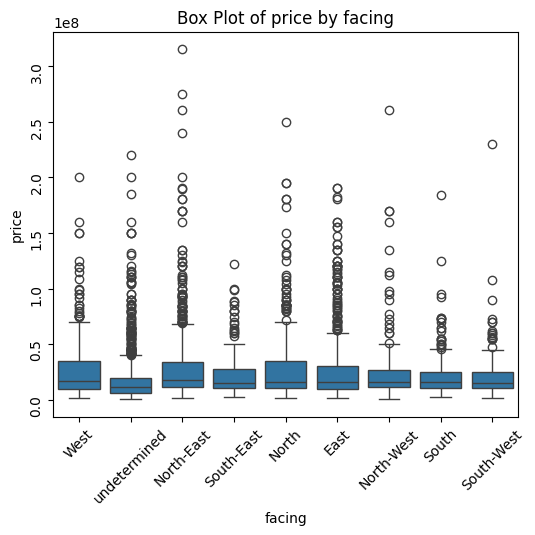

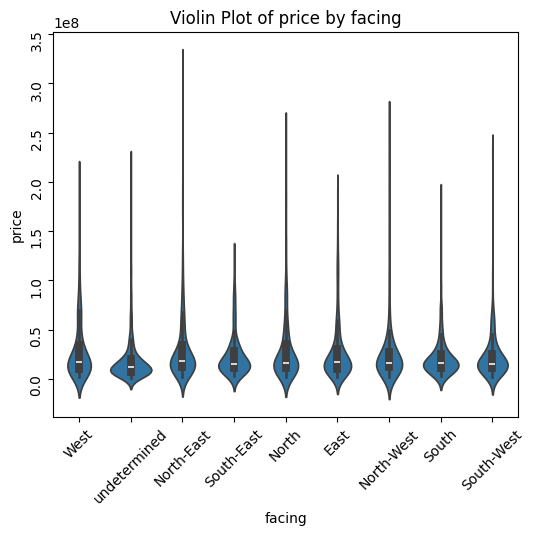

C:\Users\iampr\AppData\Local\Temp\ipykernel_6856\4162218622.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=cat_col, y=target_col, estimator='mean', ci=None)


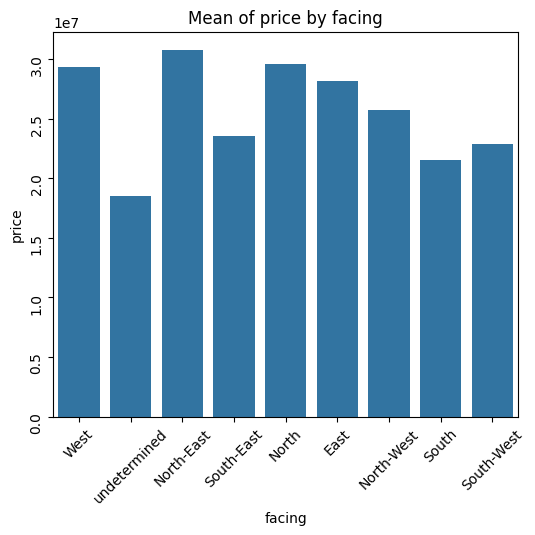

ANOVA test result: F-statistic = 13.20, p-value = 0.0000

Conclusion:
- There is a statistically significant difference in price across facing.




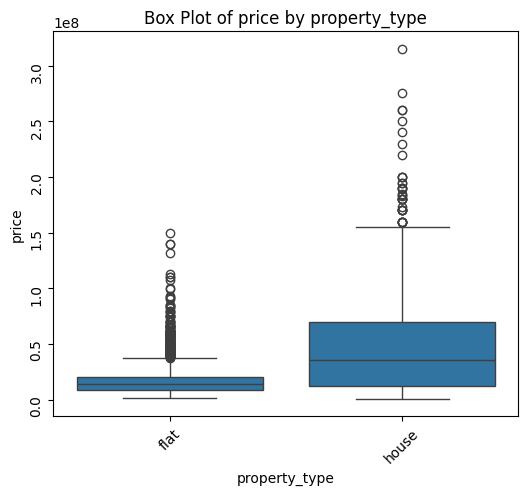

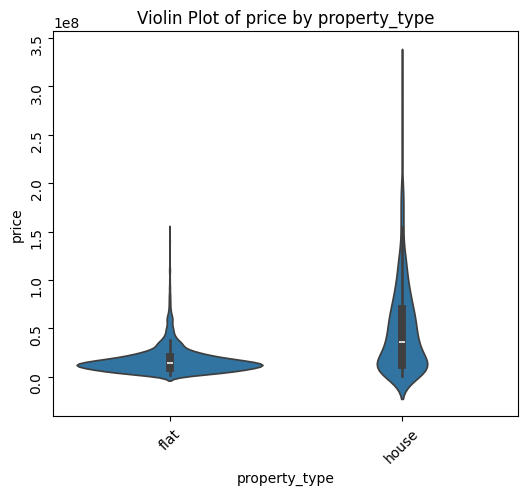

C:\Users\iampr\AppData\Local\Temp\ipykernel_6856\4162218622.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=cat_col, y=target_col, estimator='mean', ci=None)


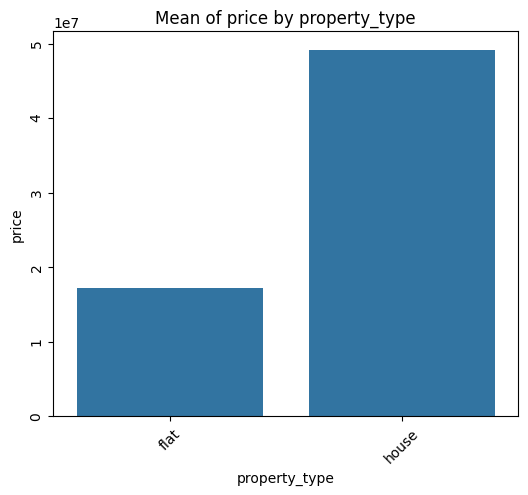

T-test result: T-statistic = -32.32, p-value = 0.0000

Conclusion:
- There is a statistically significant difference in price across property_type.




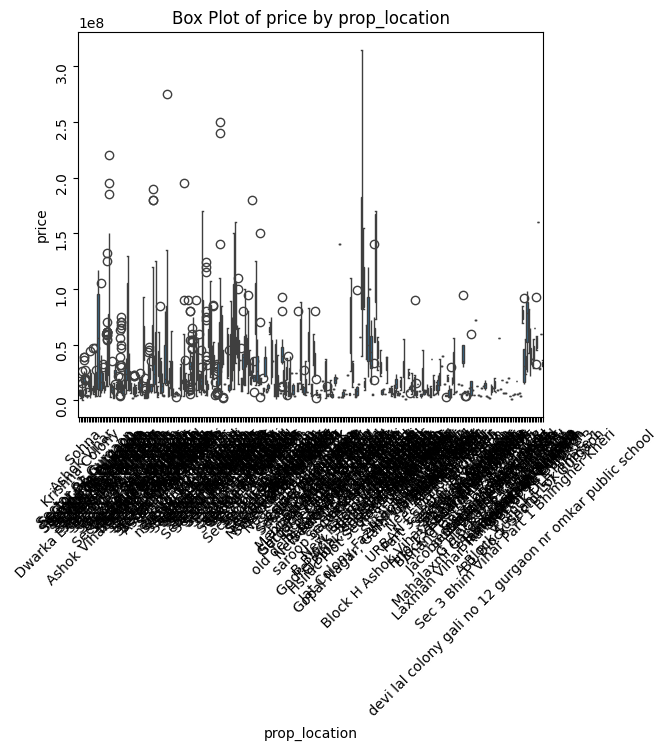

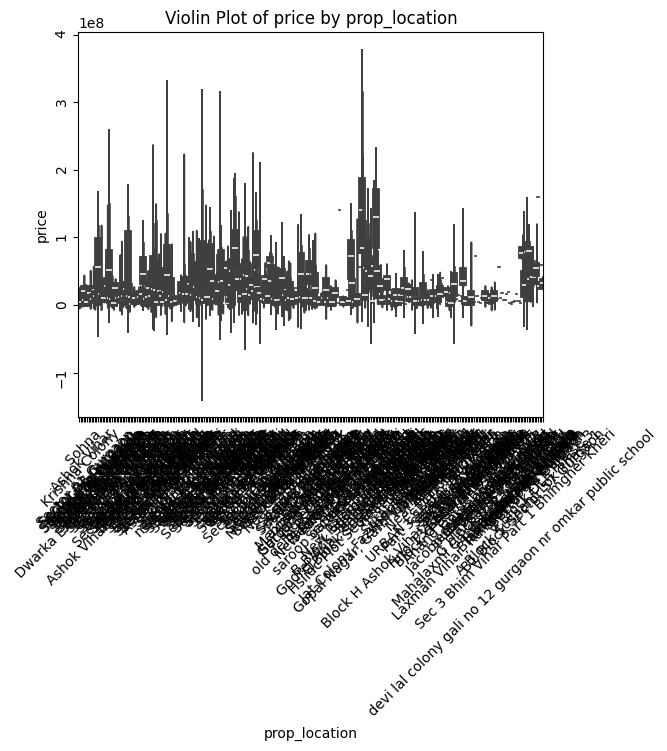

C:\Users\iampr\AppData\Local\Temp\ipykernel_6856\4162218622.py:39: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x=cat_col, y=target_col, estimator='mean', ci=None)


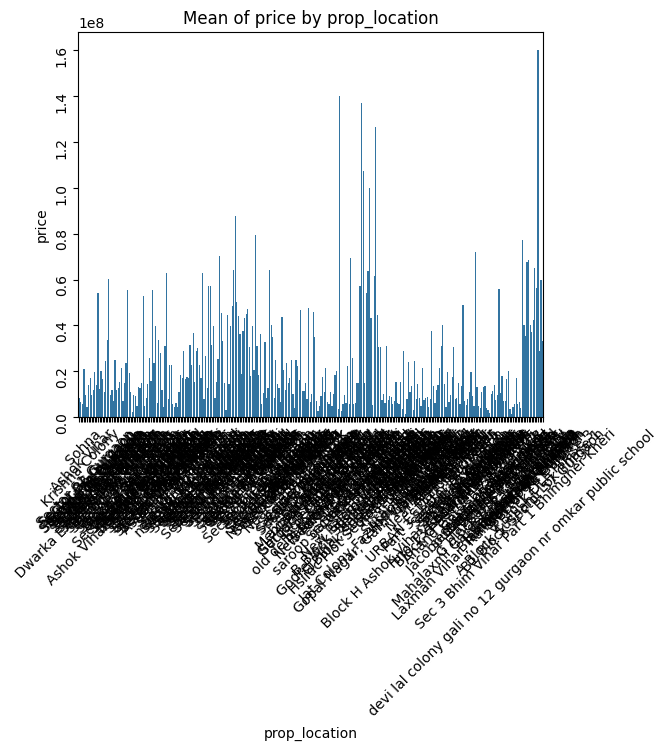

ANOVA test result: F-statistic = 15.06, p-value = 0.0000

Conclusion:
- There is a statistically significant difference in price across prop_location.




In [57]:
for i in categorical_cols:
    bivariate_numerical_categorical_analysis(df, 'price', i)

### Multivariate Analysis

In [7]:
def multivariate_analysis(df, annot=True, cmap='coolwarm', figsize=(12, 10), corr_thresh=0.1):
    # Step 1: Handle missing values (drop rows with missing data)
    df_clean = df.dropna()
    
    # Step 2: Calculate correlation matrix
    corr_matrix = df_clean.corr(numeric_only=True)
    
    # Step 3: Filter correlations based on a threshold (optional)
    if corr_thresh:
        corr_matrix = corr_matrix[(corr_matrix.abs() >= corr_thresh) | (corr_matrix.abs() == 1.0)]
    
    # Step 4: Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=annot, cmap=cmap, fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
    plt.title('Correlation Matrix', fontsize=16)
    plt.show()

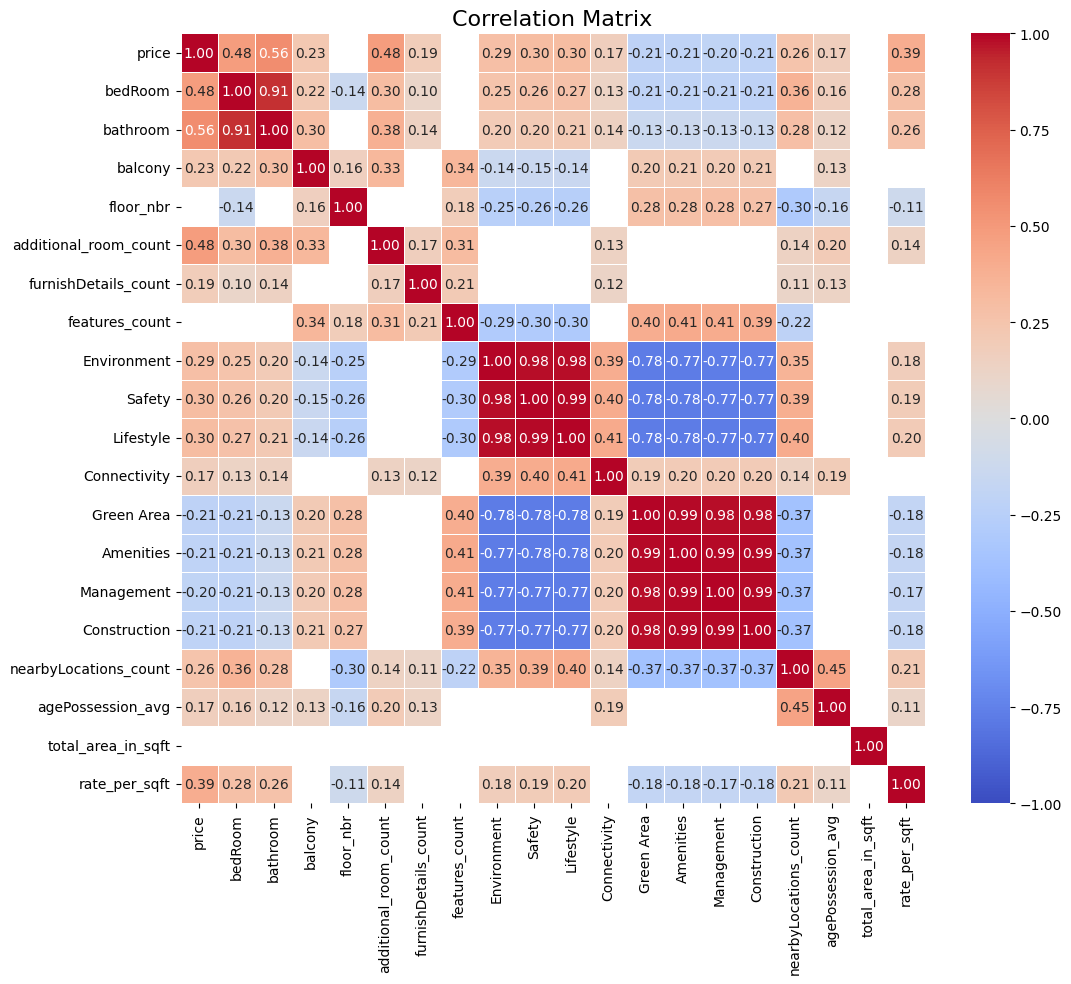

In [8]:
multivariate_analysis(df, annot=True, cmap='coolwarm', figsize=(12, 10), corr_thresh=0.1)

### drop duplicates

In [62]:
df.drop_duplicates(inplace=True)

### Export to excel

In [63]:
df.to_excel(r"data/99acre_raw_data/99acres_property_data_v4.xlsx", index=False)